# Project 2 -Aimes Housing Data and Kaggle Challenge

Problem Statement
We are attempting to build a model to predict housing prices using Elastic Net Regression to analyze 78 features for over 2000 home s sold btw 2006 and 2010.

Our goal is to identify key housing features that would influence the sale price by arriving with the least mean price error of  prediction .We will reduce the number of features in the model using the different regression models , Lasso , Ridge and linear regression.

From that we would use our model to predict sale prices on the test csv data file.


At the end we would have reduced our features to 30+ and find a good number of features to predict Sale price prediction
with lower mean squared error.

## Exploratory Data Analysis

In [362]:
#importing all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso , LassoCV, ElasticNet, ElasticNetCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler , PolynomialFeatures
from sklearn.datasets import make_classification

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format= 'retina'


In [363]:
#reading the files into dataframes
df_train= pd.read_csv('train copy.csv')
df_test= pd.read_csv('test copy.csv')

In [364]:
#replacing indices in the training and testing dataframes with ID column
df_train.set_index('Id', inplace =True)
df_test.set_index('Id', inplace =True)

### Checks on the data


In [365]:
#we do a check on the train data and test data
df_train.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                           
109  533352170           60        RL           NaN     13517   Pave   NaN   
544  531379050           60        RL          43.0     11492   Pave   NaN   
153  535304180           20        RL          68.0      7922   Pave   NaN   
318  916386060           60        RL          73.0      9802   Pave   NaN   
255  906425045           50        RL          82.0     14235   Pave   NaN   

    Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
Id                                    ...                                  
109       IR1          Lvl    AllPub  ...            0         0     NaN   
544       IR1          Lvl    AllPub  ...            0         0     NaN   
153       Reg          Lvl    AllPub  ...            0         0     NaN   
318       Reg          Lvl    AllPub  ...            0         0     NaN   
255       IR1          Lvl    AllPub  ...            0         0     NaN   

    Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                      
109   NaN          NaN        0       3     2010        WD      130500  
544   NaN          NaN        0       4     2009        WD      220000  
153   NaN          NaN        0       1     2010        WD      109000  
318   NaN          NaN        0       4     2010        WD      174000  
255   NaN          NaN        0       3     2010        WD      138500  

[5 rows x 80 columns]

In [366]:
#doing a check on test data 
df_test.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                            
2658  902301120          190        RM          69.0      9142   Pave  Grvl   
2718  905108090           90        RL           NaN      9662   Pave   NaN   
2414  528218130           60        RL          58.0     17104   Pave   NaN   
1989  902207150           30        RM          60.0      8520   Pave   NaN   
625   535105100           20        RL           NaN      9500   Pave   NaN   

     Lot Shape Land Contour Utilities  ... 3Ssn Porch Screen Porch Pool Area  \
Id                                     ...                                     
2658       Reg          Lvl    AllPub  ...          0            0         0   
2718       IR1          Lvl    AllPub  ...          0            0         0   
2414       IR1          Lvl    AllPub  ...          0            0         0   
1989       Reg          Lvl    AllPub  ...          0            0         0   
625        IR1          Lvl    AllPub  ...          0          185         0   

     Pool QC Fence Misc Feature Misc Val  Mo Sold  Yr Sold  Sale Type  
Id                                                                     
2658     NaN   NaN          NaN        0        4     2006        WD   
2718     NaN   NaN          NaN        0        8     2006        WD   
2414     NaN   NaN          NaN        0        9     2006        New  
1989     NaN   NaN          NaN        0        7     2007        WD   
625      NaN   NaN          NaN        0        7     2009        WD   

[5 rows x 79 columns]

In [367]:
#now we search for null values , sort them by descending order in train set
df_train.isnull().sum().sort_values(ascending=False).head(10)

Pool QC          2042
Misc Feature     1986
Alley            1911
Fence            1651
Fireplace Qu     1000
Lot Frontage      330
Garage Qual       114
Garage Finish     114
Garage Cond       114
Garage Yr Blt     114
dtype: int64

In [368]:
#now we search for null values sort them for test data by descending order in test set
df_test.isnull().sum().sort_values(ascending=False).head(10)

Pool QC          875
Misc Feature     838
Alley            821
Fence            707
Fireplace Qu     422
Lot Frontage     160
Garage Cond       45
Garage Qual       45
Garage Yr Blt     45
Garage Finish     45
dtype: int64

In [369]:
df_train.shape

(2051, 80)

In [370]:
df_test.shape

(879, 79)

In [371]:
df_train.head(2)

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                           
109  533352170           60        RL           NaN     13517   Pave   NaN   
544  531379050           60        RL          43.0     11492   Pave   NaN   

    Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
Id                                    ...                                  
109       IR1          Lvl    AllPub  ...            0         0     NaN   
544       IR1          Lvl    AllPub  ...            0         0     NaN   

    Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                      
109   NaN          NaN        0       3     2010        WD      130500  
544   NaN          NaN        0       4     2009        WD      220000  

[2 rows x 80 columns]

In [372]:
df_train.info()  #check null and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [373]:
df_test.info() # check datatypes of test data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              879 non-null    int64  
 1   MS SubClass      879 non-null    int64  
 2   MS Zoning        879 non-null    object 
 3   Lot Frontage     719 non-null    float64
 4   Lot Area         879 non-null    int64  
 5   Street           879 non-null    object 
 6   Alley            58 non-null     object 
 7   Lot Shape        879 non-null    object 
 8   Land Contour     879 non-null    object 
 9   Utilities        879 non-null    object 
 10  Lot Config       879 non-null    object 
 11  Land Slope       879 non-null    object 
 12  Neighborhood     879 non-null    object 
 13  Condition 1      879 non-null    object 
 14  Condition 2      879 non-null    object 
 15  Bldg Type        879 non-null    object 
 16  House Style      879 non-null    object 
 17  Overall Qual

###Investigating Target Variable in homes , Sales price

In [374]:
#checking sale prices Lowest sale prices for houses 12789 and 13100

df_train['SalePrice'].sort_values(ascending=True)

Id
182      12789
1554     13100
727      34900
2844     35000
2881     35311
         ...  
2333    556581
434     582933
2451    584500
1638    591587
45      611657
Name: SalePrice, Length: 2051, dtype: int64

## EDA Exploratory data analysis (investigating features that affect SalesPrice the most)

In [375]:
df_train['SalePrice'].mean()

181469.70160897123

In [376]:
df_train['SalePrice'].median()

162500.0

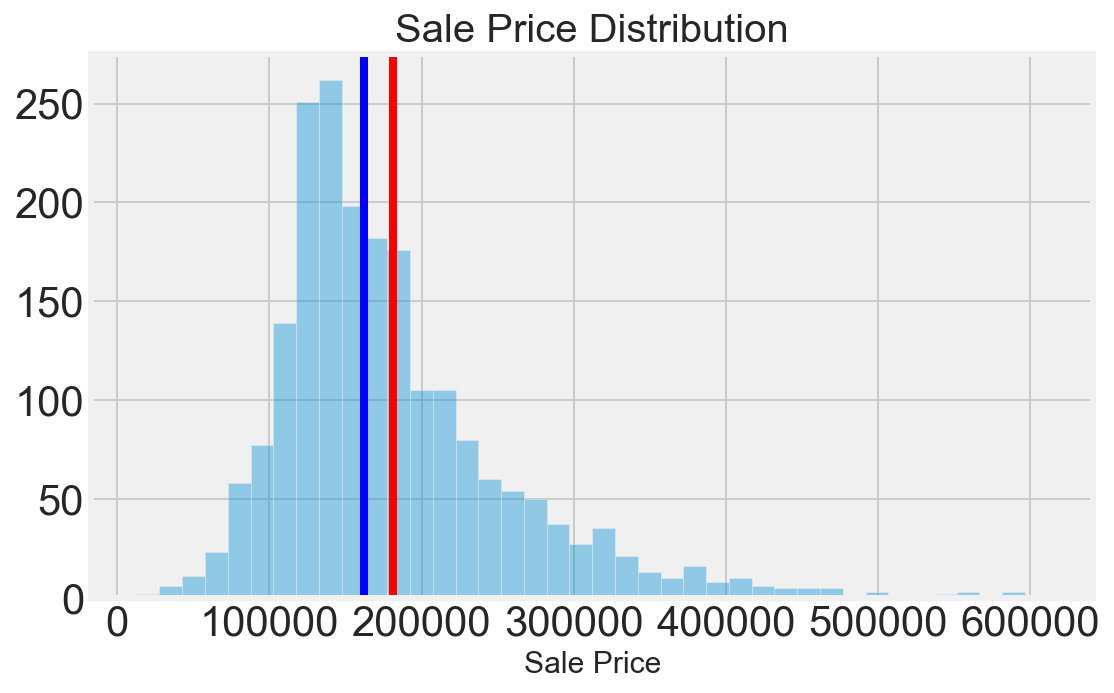

In [377]:
#lets plot a histogram for salesprice distribution
plt.figure(figsize=(8,5))
sns.distplot(df_train ['SalePrice'],kde=False, bins=40)
plt.axvline(df_train['SalePrice']. mean(), 0,250, color ='red')
plt.axvline(df_train['SalePrice'].median(), 0,250, color ='blue')
plt.title('Sale Price Distribution', size=20)
plt.xlabel('Sale Price', size = 15);

Sales price is left skewed.

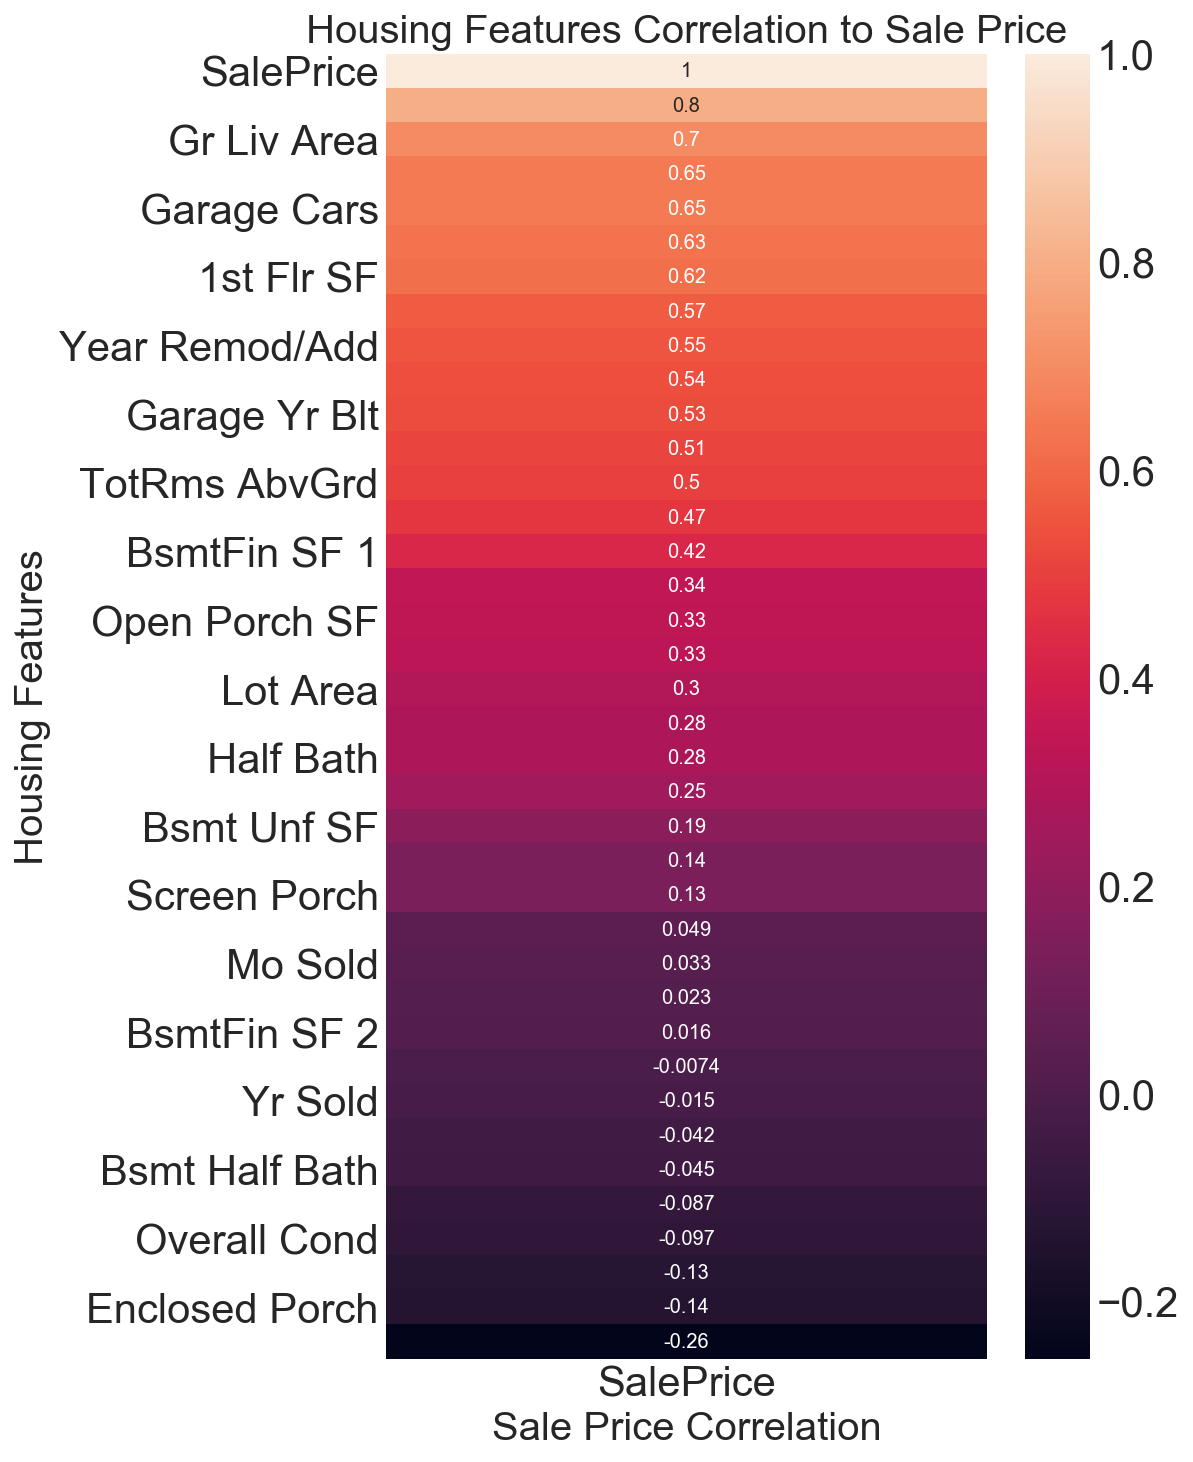

In [378]:
#investigating features correlation to Sales Price
plt.figure(figsize =(6,12))
sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by ='SalePrice', ascending= False), annot = True)
plt.title('Housing Features Correlation to Sale Price', fontsize =20)
plt.xlabel('Sale Price Correlation', fontsize =20)
plt.ylabel('Housing Features', fontsize=20);

In [379]:
#sorting this  by descending order
top_features = df_train.corr()[['SalePrice']].sort_values(by ='SalePrice', ascending= False)
top_features.drop(['SalePrice'],inplace= True)

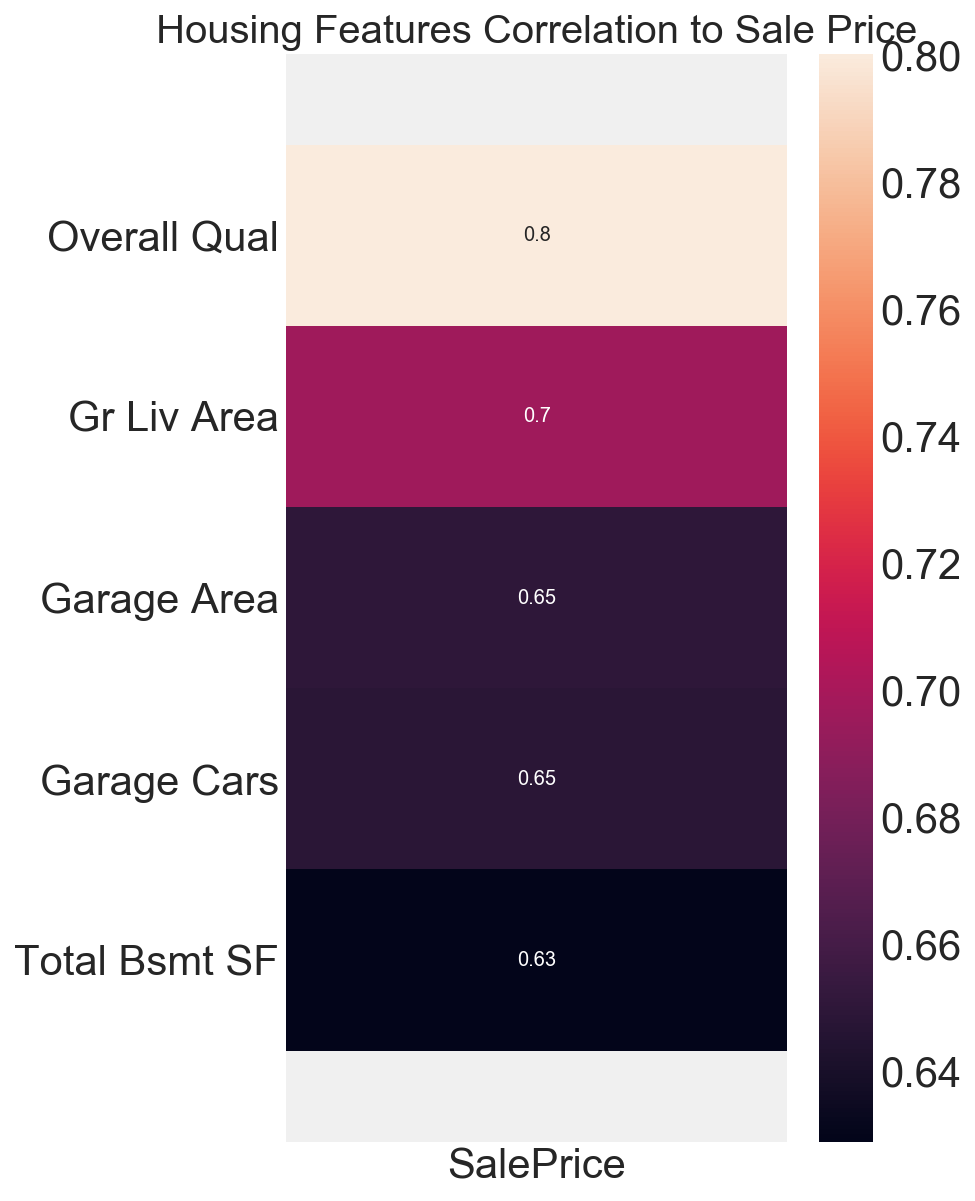

In [380]:
#checking correlation for all the features
plt.figure(figsize=(5,10))
sns.heatmap(top_features.head(),annot =True)
sns.set(font_scale= 1.9)
plt.title('Housing Features Correlation to Sale Price', fontsize =20)
           
#fix for mpl bug that cuts off top/bottom of seaborn viz
b,t=plt.ylim() # discover the values of bottom and top
b+=0.5  #subtract 0.5 to the bottom
t-=0.5 #subtract 0.5 from the top
plt.ylim(b,t);      

**Visualizing Top 5 Features by Correlation

### 1)feature overall quality

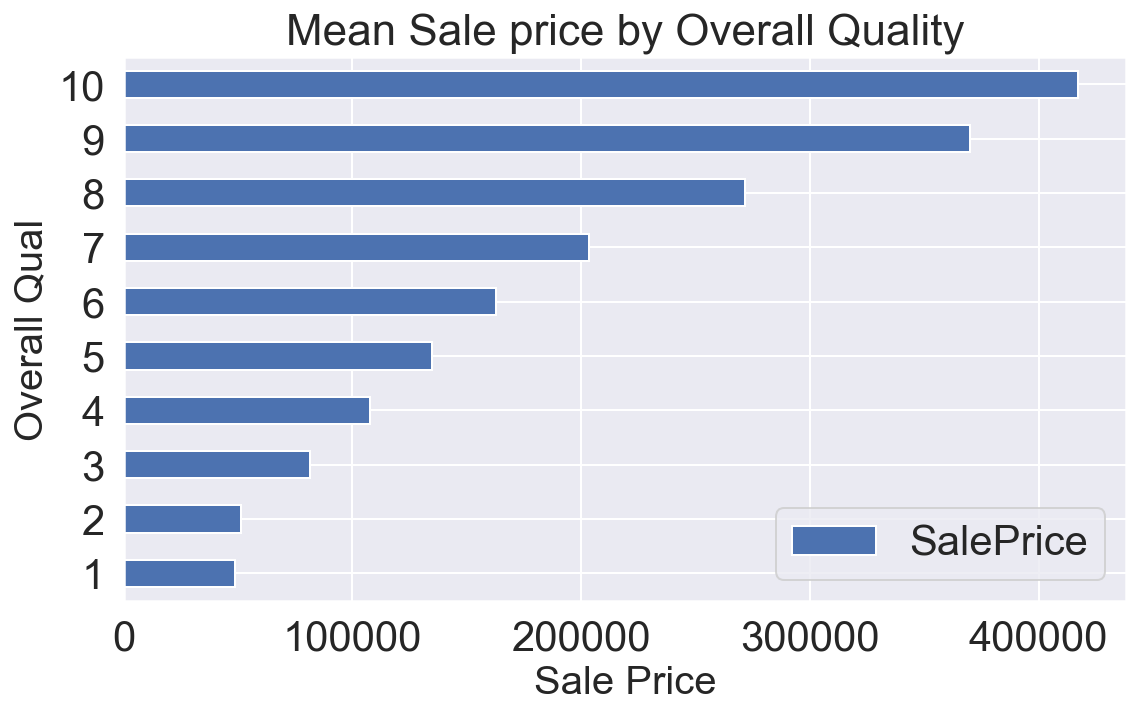

In [381]:
#plotting mean sales price per quality level 
df_train.groupby(['Overall Qual'])[['SalePrice']].mean().plot(kind='barh', figsize=(8,5))
plt.title('Mean Sale price by Overall Quality', size =22)
plt.ylabel('Overall Qual', size =20)
plt.xlabel('Sale Price', size =20);

## 2) Above Ground Living Area

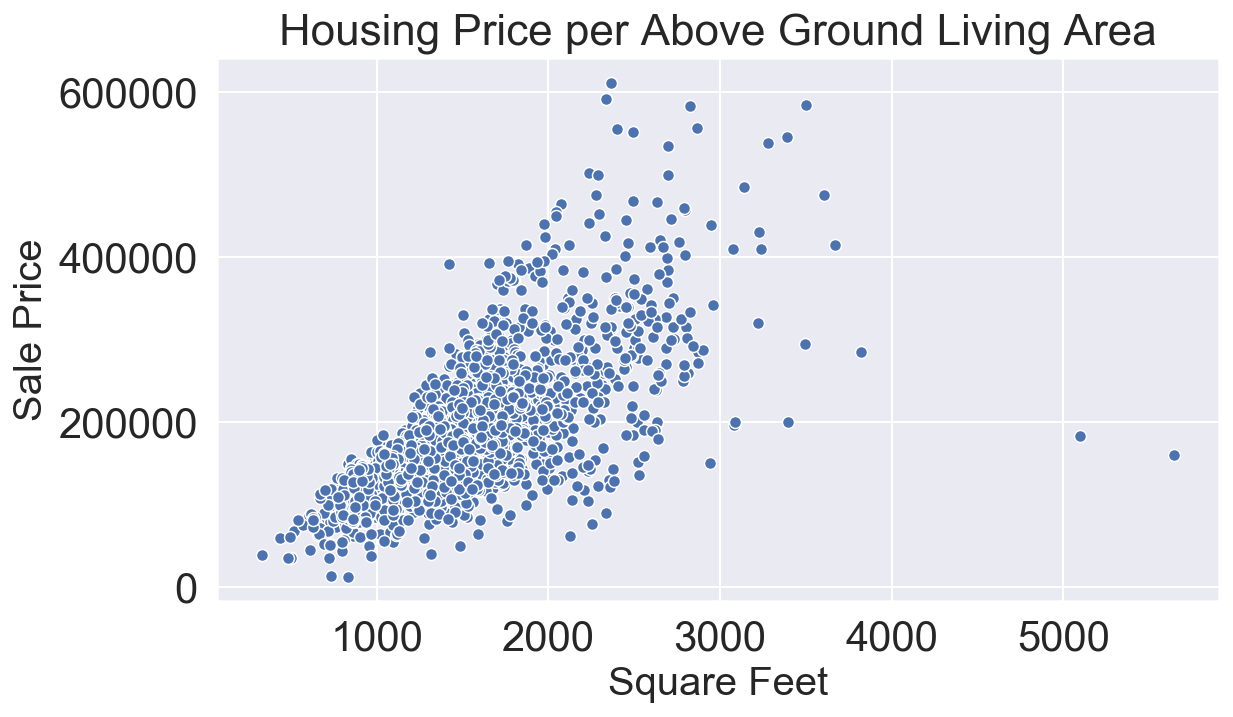

In [382]:
#Plotting Sale Price vs Above Ground Living Area
plt.figure(figsize =(8,5))
sns.scatterplot(x=df_train['Gr Liv Area'], y= df_train['SalePrice'])
plt.title('Housing Price per Above Ground Living Area', size =22)
plt.xlabel('Square Feet', size =20)
plt.ylabel('Sale Price', size =20);
        

There seems to have a very positive correlation for housing price per above ground living area and sales price .

### 3) GARAGE AREA

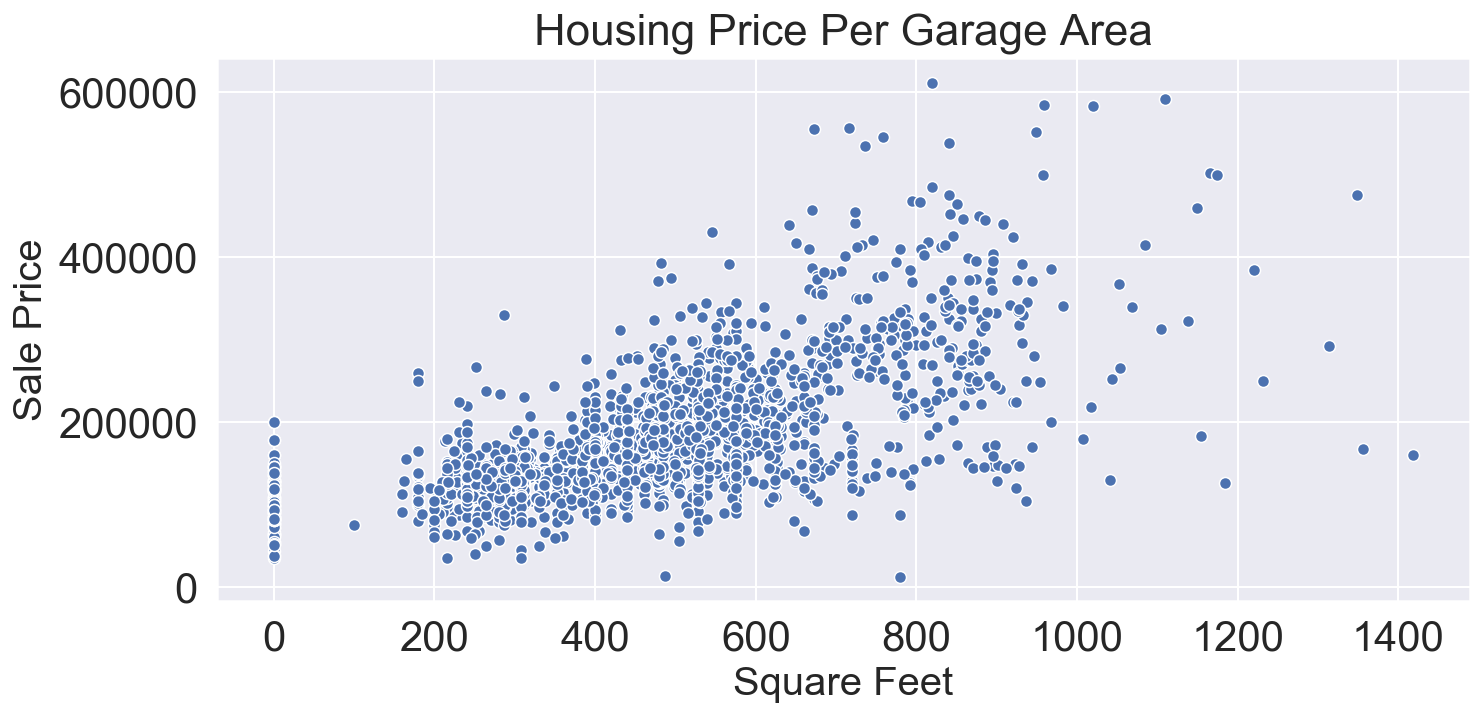

In [383]:
#PLotting Sale Price vs Garage Area
plt.figure(figsize=(10,5))
sns.scatterplot(x= df_train['Garage Area'], y=df_train['SalePrice'])
plt.title('Housing Price Per Garage Area', size =22)
plt.xlabel('Square Feet', size =20)
plt.ylabel('Sale Price', size =20);

### 4)NUMBER OF GARAGE CARS

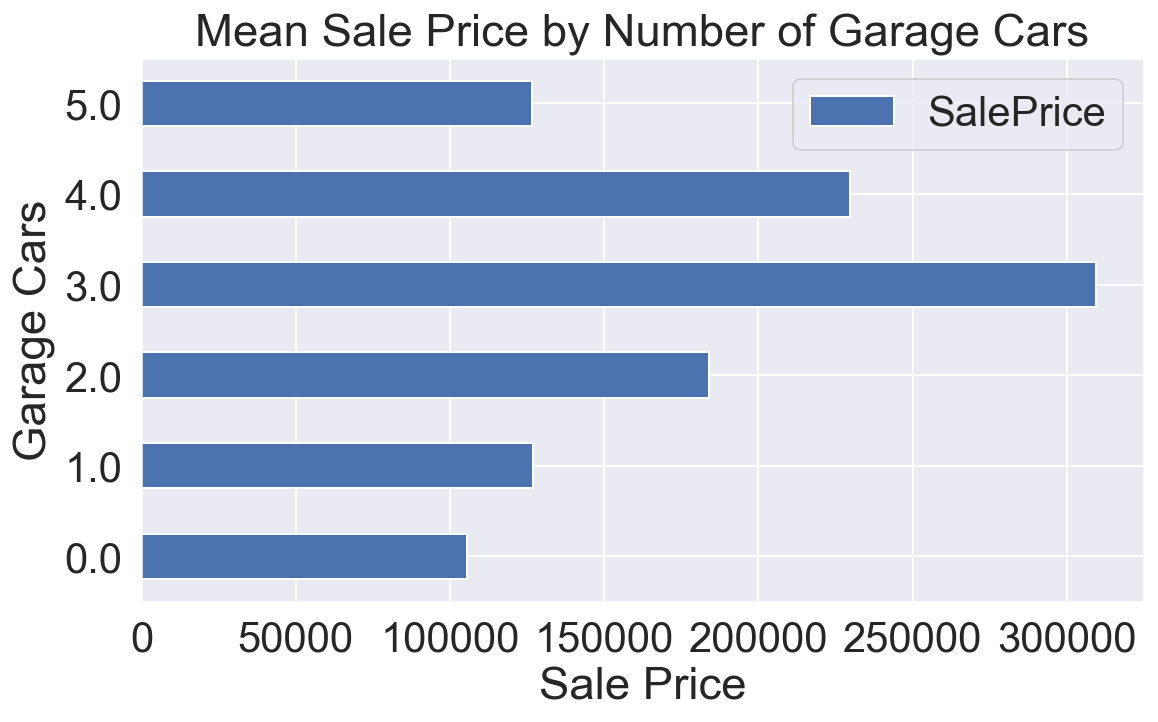

In [384]:
#plotting mean sales Prices per garage car amount . We will set these as categories
df_train.groupby(['Garage Cars'])[['SalePrice']].mean().plot(kind='barh', figsize=(8,5))
plt.title('Mean Sale Price by Number of Garage Cars')
plt.xlabel('Sale Price');

### 5) TOTAL BASEMENT SQUARE FEET

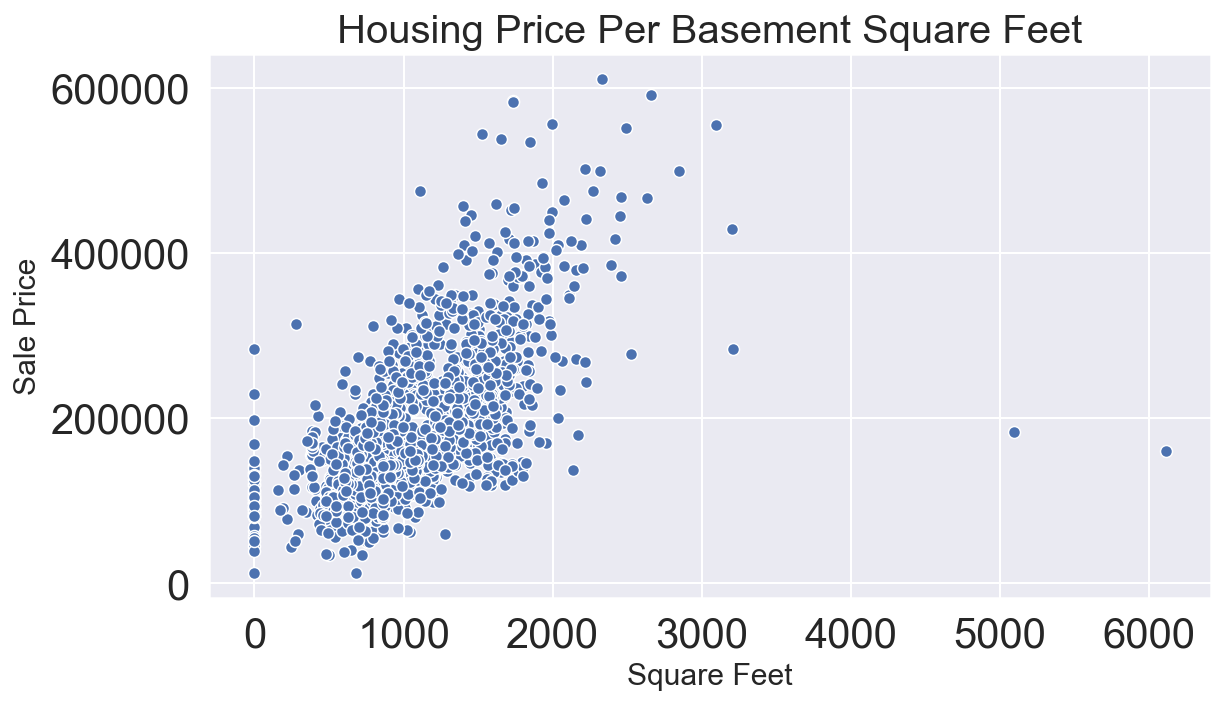

In [385]:
#Plotting Sale Price vs Total Basement Square Feet
plt.figure(figsize= (8,5))
sns.scatterplot(x=df_train['Total Bsmt SF'], y=df_train['SalePrice'])
plt.title('Housing Price Per Basement Square Feet', size =20)
plt.xlabel('Square Feet', size =15)
plt.ylabel('Sale Price', size =15);

There are 2 outliers with square feet above 5000 but does not have a high sales price. which dont make quite sense yet.

Understanding Materials

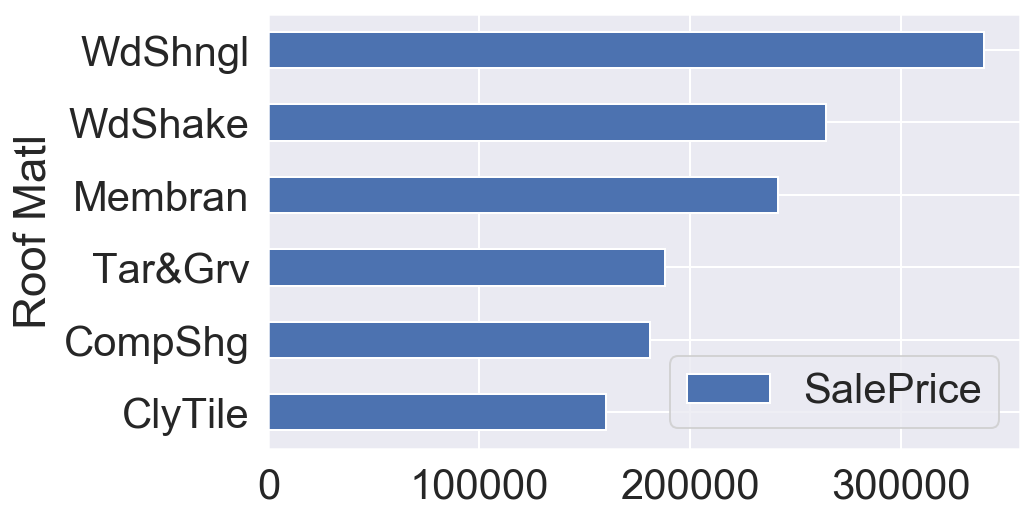

In [386]:
df_train.groupby(['Roof Matl'])[['SalePrice']].mean().sort_values(by = 'SalePrice', ascending = True).plot(kind='barh');

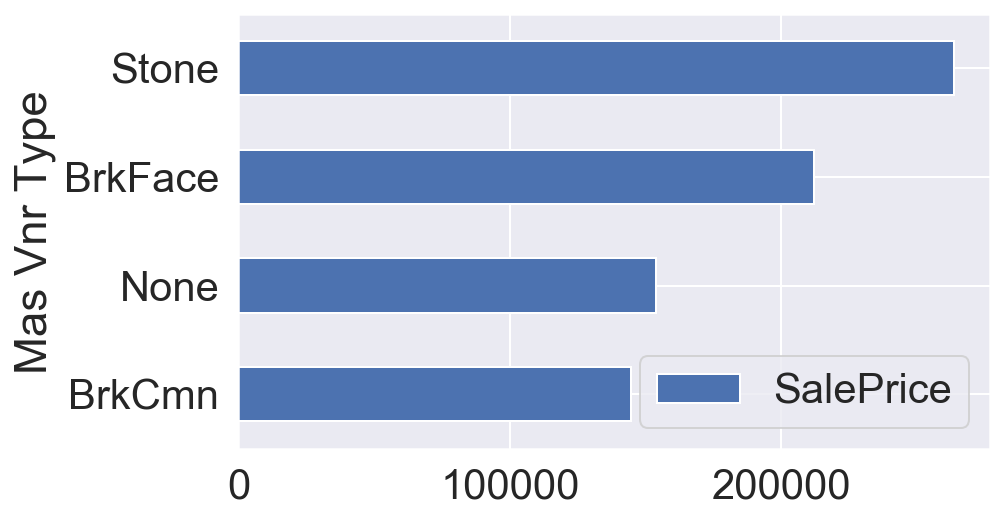

In [387]:
df_train.groupby(['Mas Vnr Type'])[['SalePrice']].mean().sort_values(by ='SalePrice', ascending= True).plot(kind='barh');

### lets investigate other features correlation

In [388]:
df_train.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

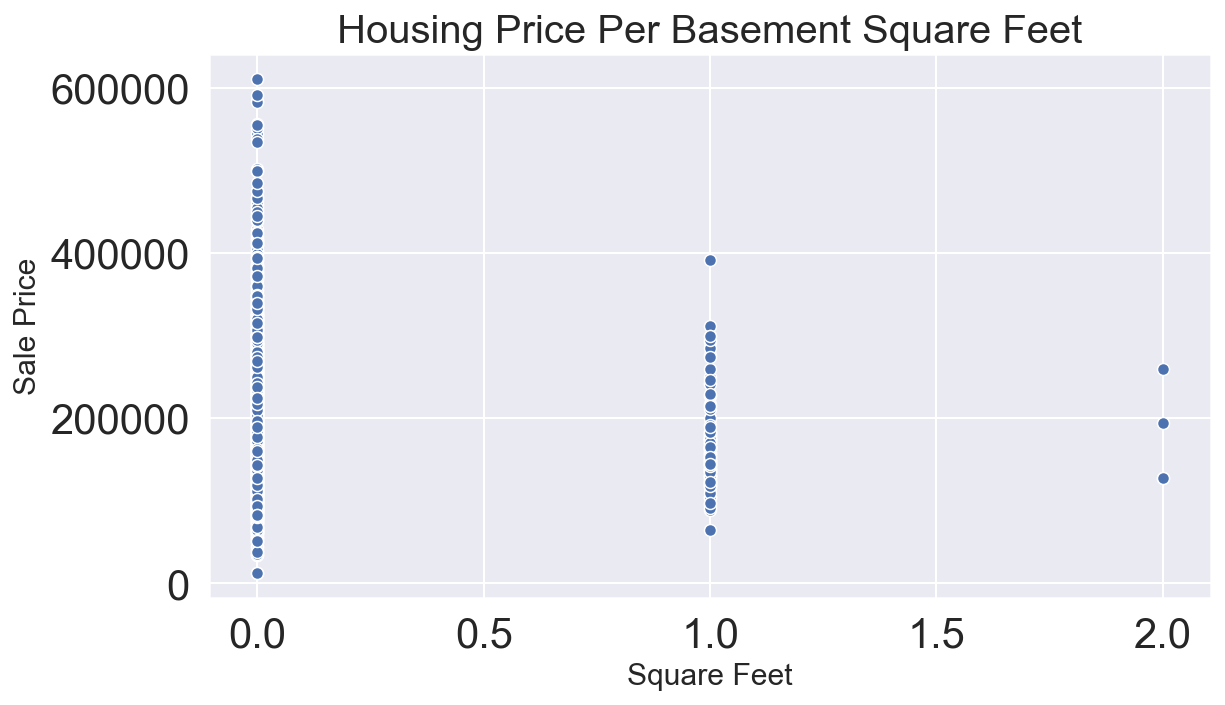

In [389]:
plt.figure(figsize= (8,5))
sns.scatterplot(x=df_train['Bsmt Half Bath'], y=df_train['SalePrice'])
plt.title('Housing Price Per Basement Square Feet', size =20)
plt.xlabel('Square Feet', size =15)
plt.ylabel('Sale Price', size =15);

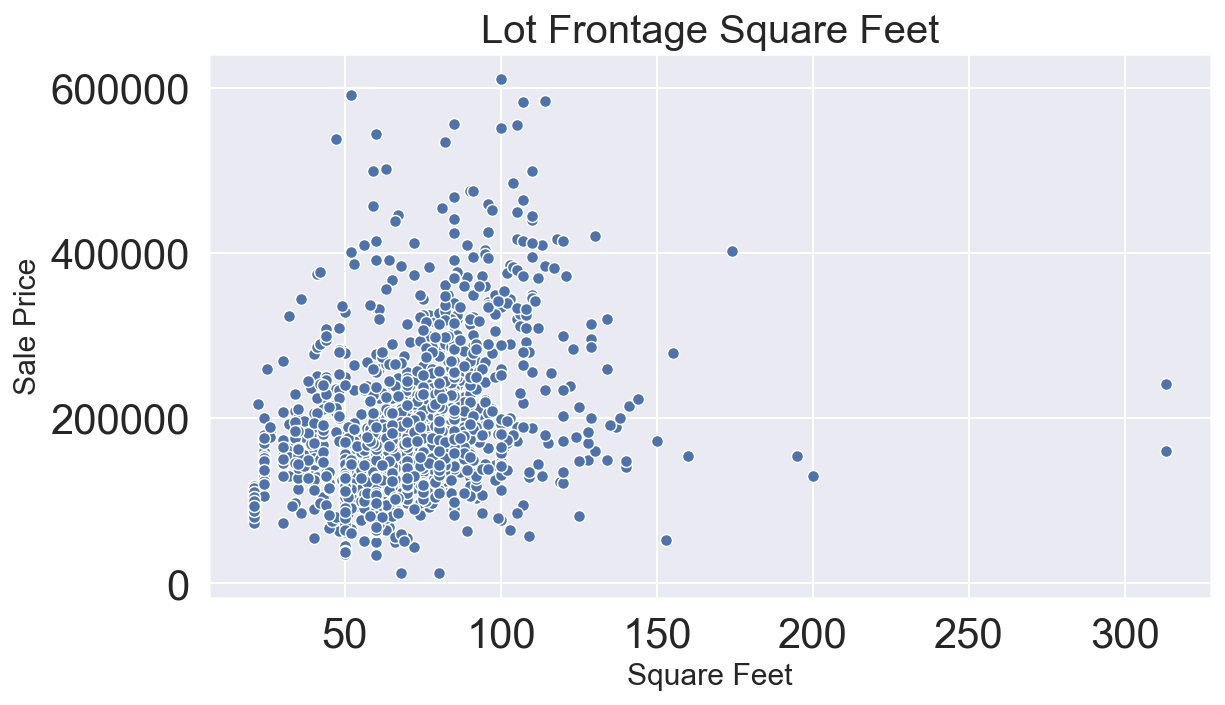

In [390]:
plt.figure(figsize= (8,5))
sns.scatterplot(x=df_train['Lot Frontage'], y=df_train['SalePrice'])
plt.title('Lot Frontage Square Feet', size =20)
plt.xlabel('Square Feet', size =15)
plt.ylabel('Sale Price', size =15);

housing price per basement square feet does not seem to affct sales price. most of the data fall with very little basement square feet

### Overall quality and External quality boxplot

In [391]:
def box_plott(column_names, xtick_labels ,ylabel, title , fndf =df_train):
    fig , ax = plt.subplots(figsize =(15,12))
    df= pd.DataFrame(data=fndf, columns = column_names)
    plt.xticks(fontsize =15)
    plt.yticks(fontsize =18)
    
    #plt.grid()
    plotty=sns.boxplot(x='variable', y ='value', data= pd.melt(df), showfliers= True )
    sns.swarmplot(x='variable', y='value', data=pd.melt(df), color='gold', edgecolor = 'brown' ,size =8)
    plotty.axes.set_title(title,fontsize = 25)
    plotty.set_xlabel('', fontsize =20)
    plotty.set_ylabel(ylabel, fontsize =20)
    plotty.set(xticklabels=xtick_labels);

Text(0.5, 1.0, 'Overalll Qual Boxplots')

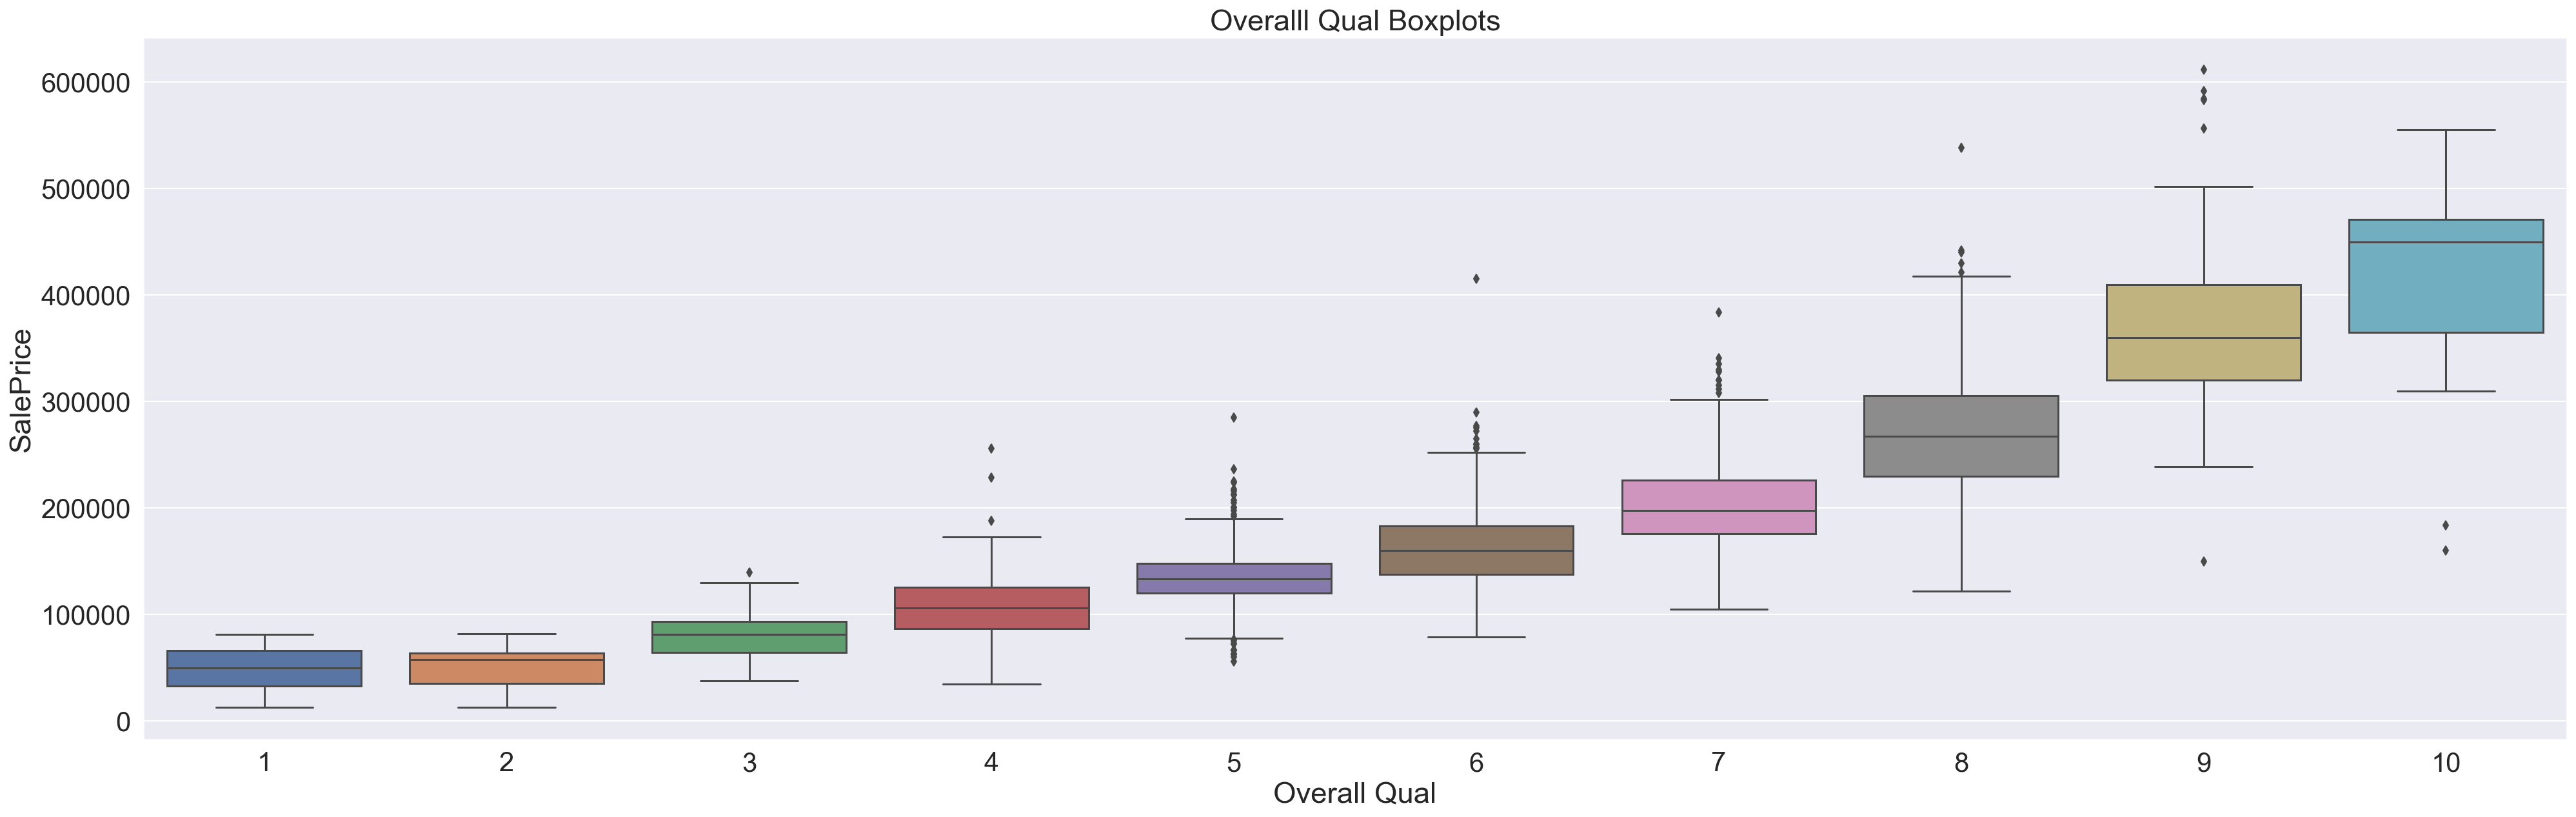

In [392]:
plt.figure(figsize=(30,10))
sns.boxplot(x='Overall Qual', y= 'SalePrice', data =df_train.iloc[:2050,:]);
plt.title('Overalll Qual Boxplots')

We can see that if we look at external quality boxplots , the higher the quality , the higher the sale price.

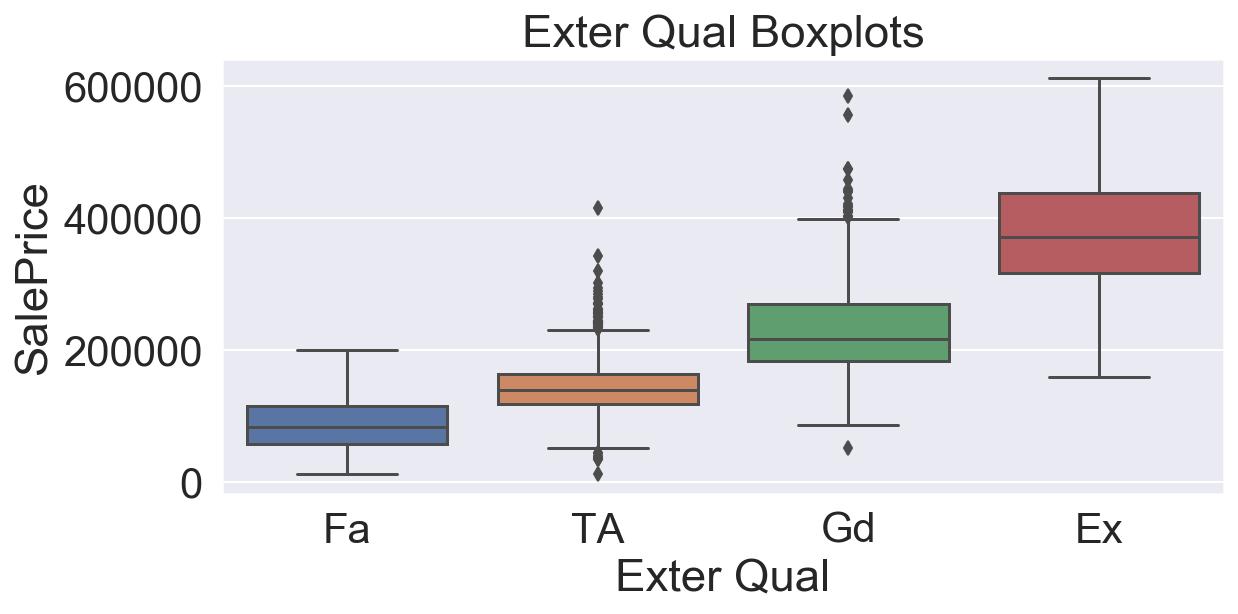

In [393]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Exter Qual' , y= 'SalePrice', data= df_train.iloc[:2050,:], order =['Fa', 'TA', 'Gd', 'Ex']);
plt.title('Exter Qual Boxplots');

The higher the external quality the higher the SalesPrice

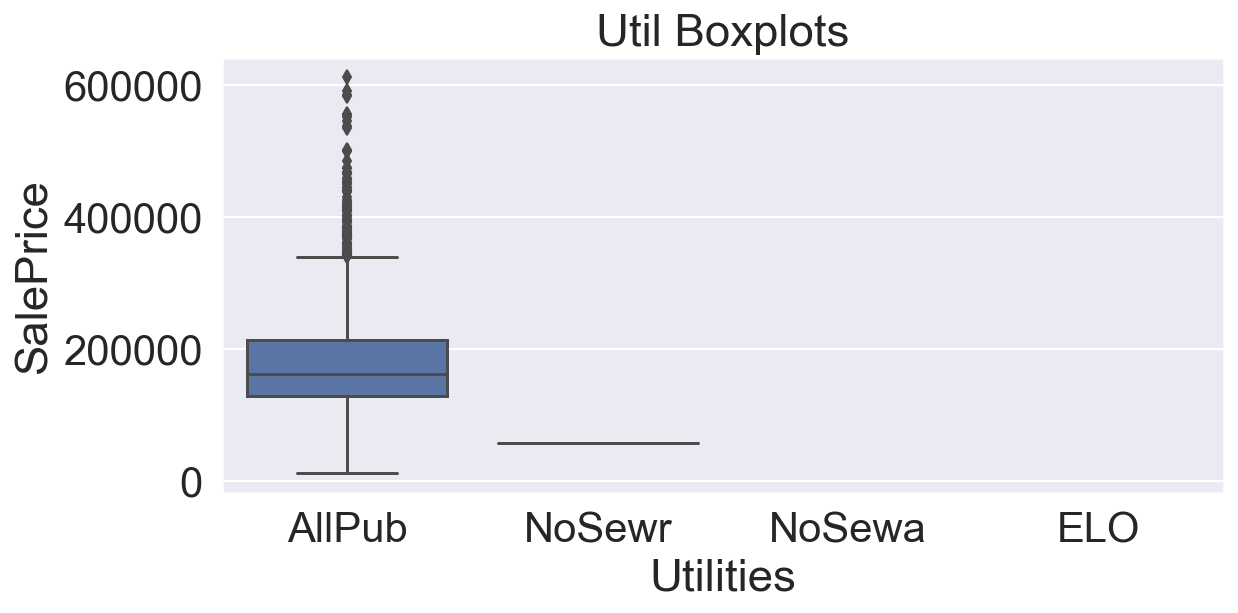

In [394]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Utilities' , y= 'SalePrice', data= df_train.iloc[:2050,:], order =['AllPub', 'NoSewr', 'NoSewa', 'ELO']);
plt.title('Util Boxplots');

Basically All public utilities have the spread of sales price. and no sewer has a little.

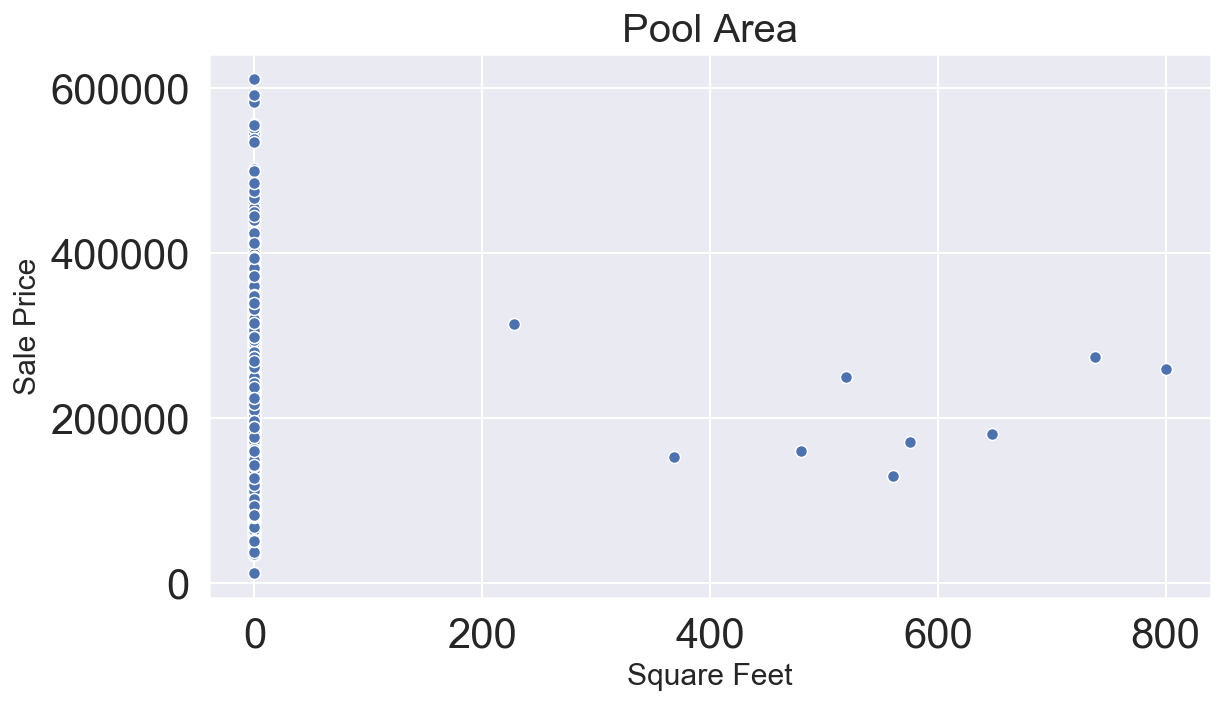

In [395]:
plt.figure(figsize= (8,5))
sns.scatterplot(x=df_train['Pool Area'], y=df_train['SalePrice'])
plt.title('Pool Area', size =20)
plt.xlabel('Square Feet', size =15)
plt.ylabel('Sale Price', size =15);

there seem to be no correlation with Pool area and sale price

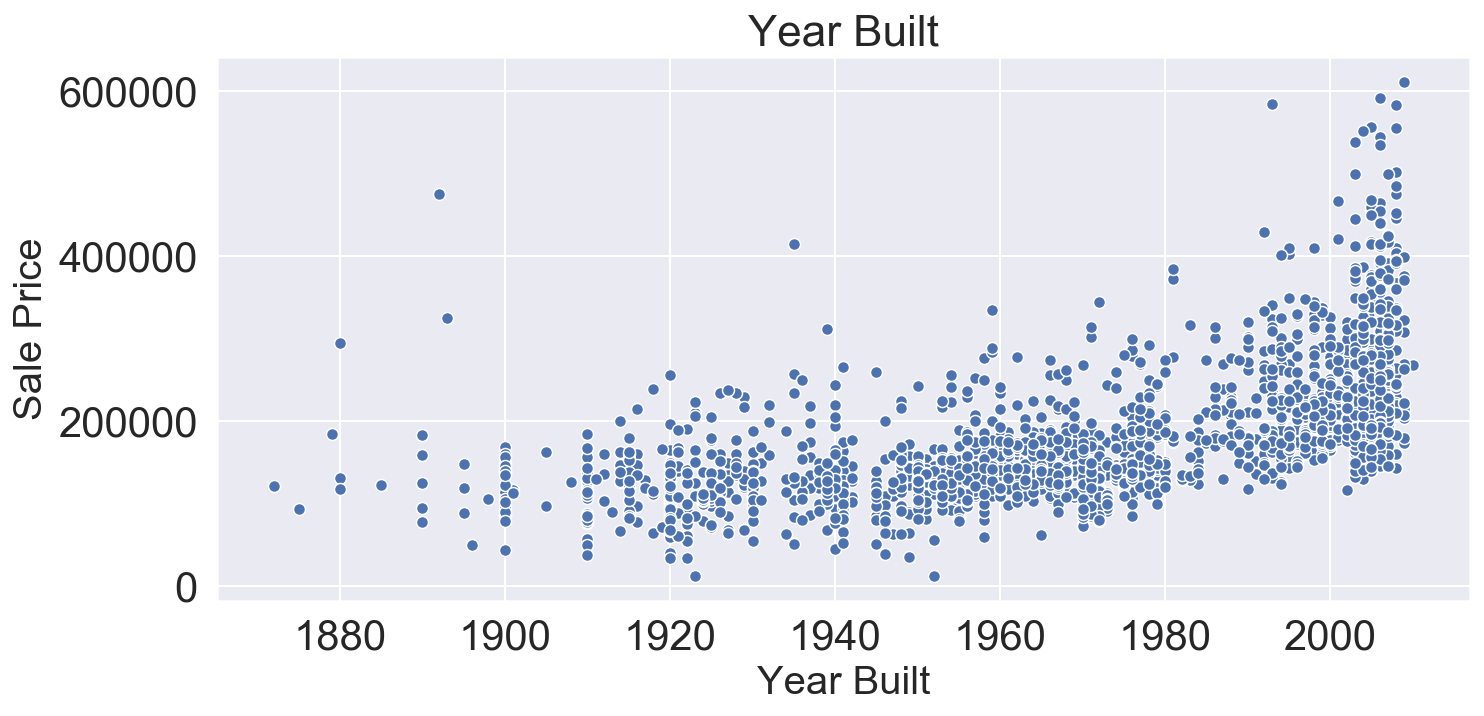

In [396]:
#plotting Sale Price vs year Built
plt.figure(figsize=(10,5))
sns.scatterplot(x= df_train['Year Built'], y=df_train['SalePrice'])
plt.title('Year Built', size =22)
plt.xlabel('Year Built', size =20)
plt.ylabel('Sale Price', size =20);

THere dont seeem to have any correlation to year built to Saleprice , time for it to drop.

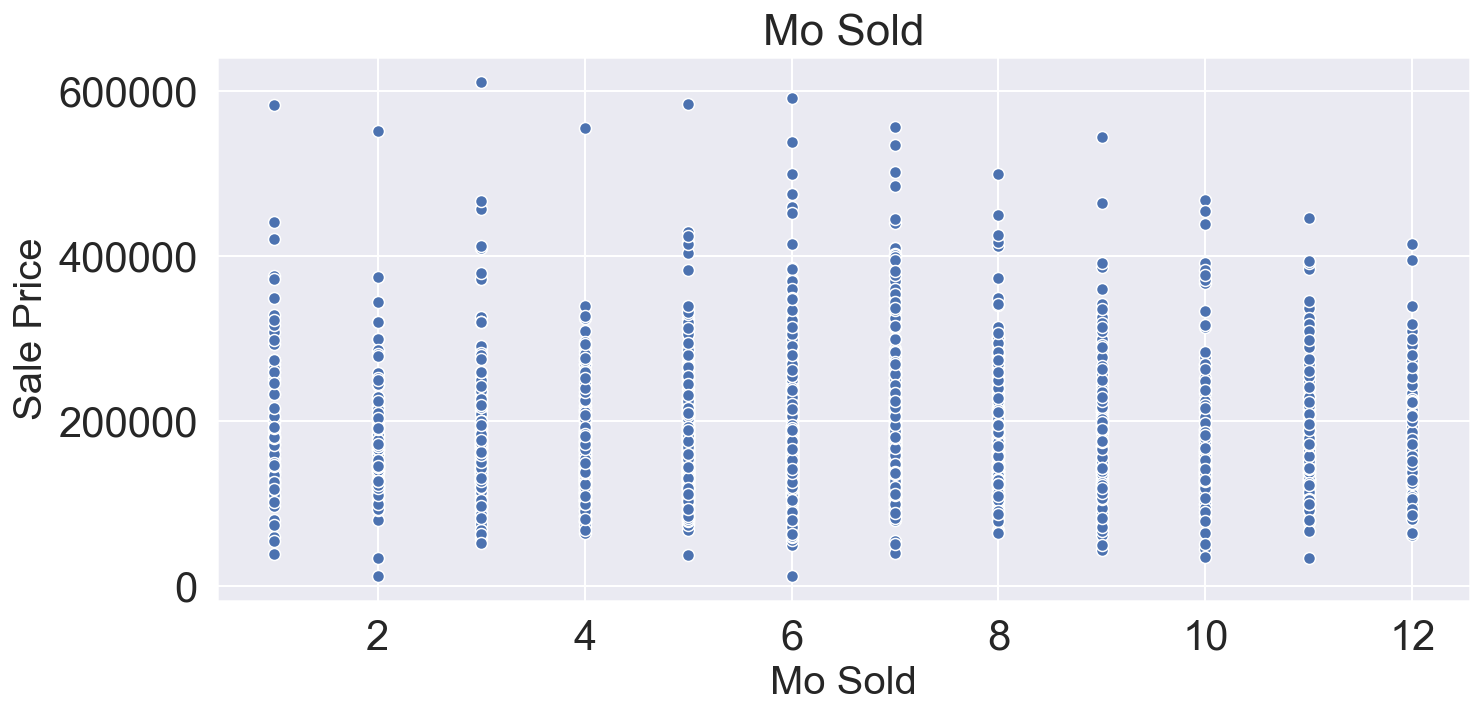

In [397]:
#plotting Sale Price vs year Built
plt.figure(figsize=(10,5))
sns.scatterplot(x= df_train['Mo Sold'], y=df_train['SalePrice'])
plt.title('Mo Sold', size =22)
plt.xlabel('Mo Sold', size =20)
plt.ylabel('Sale Price', size =20);

there seems to be no correlation with Mo sold and sale price. this column should be dropped.

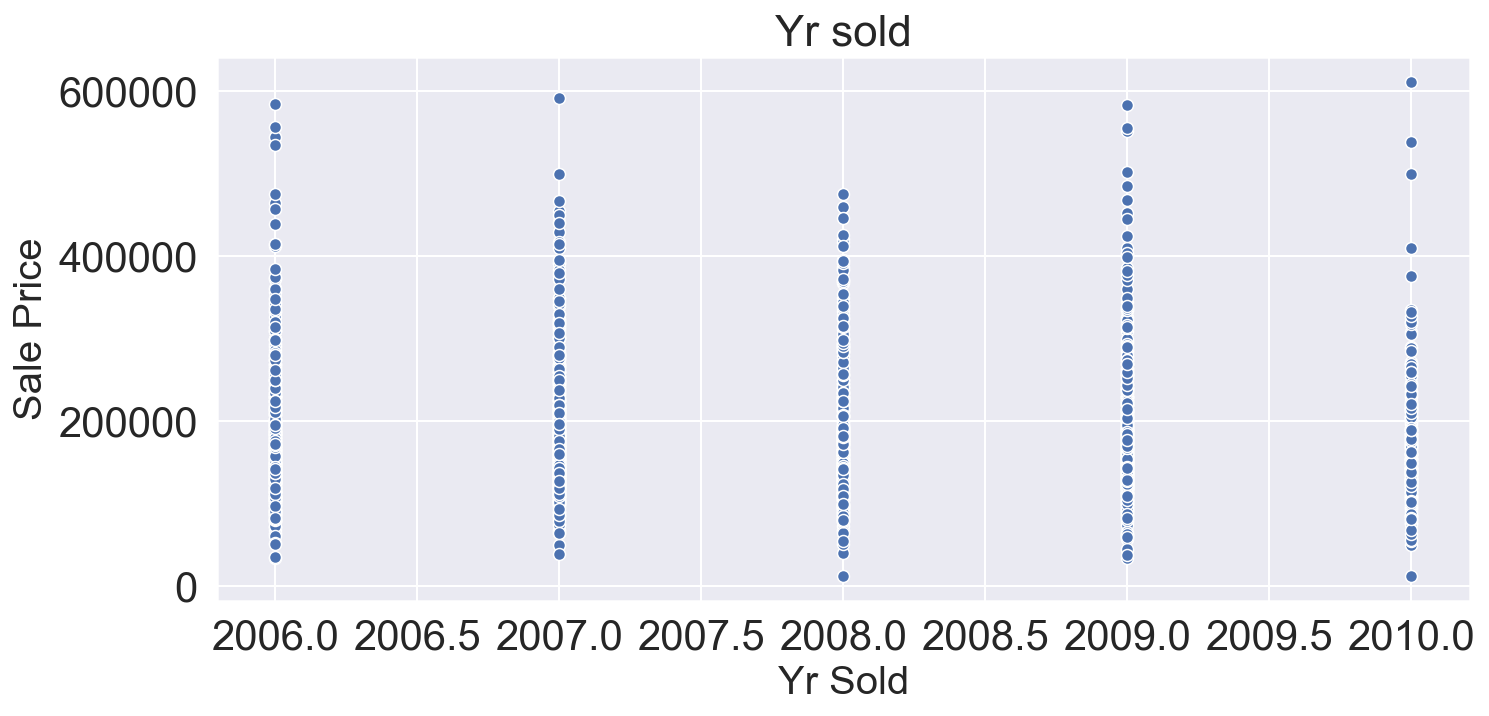

In [398]:
#plotting Sale Price vs year Built
plt.figure(figsize=(10,5))
sns.scatterplot(x= df_train['Yr Sold'], y=df_train['SalePrice'])
plt.title('Yr sold', size =22)
plt.xlabel('Yr Sold', size =20)
plt.ylabel('Sale Price', size =20);

there seems to be no correlation with year sold and sale price. this column should be dropped.

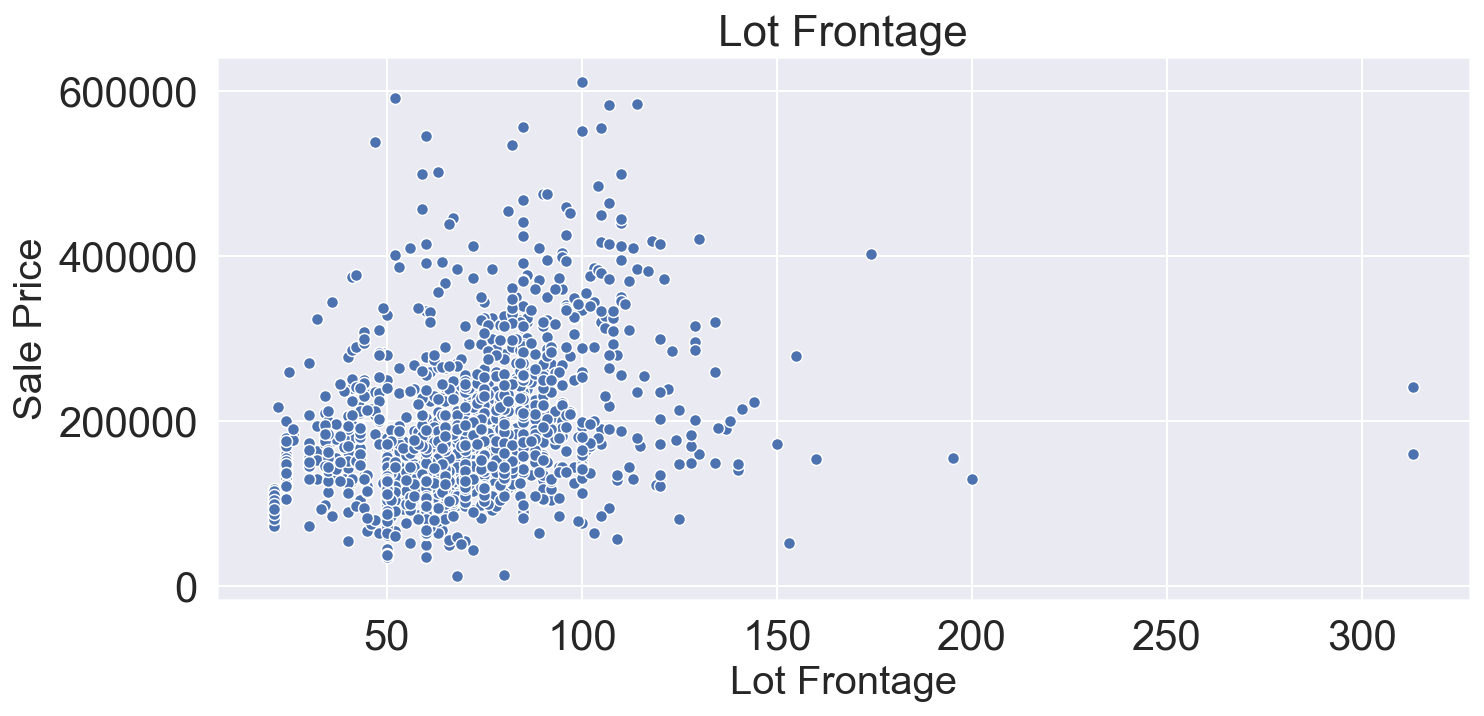

In [399]:
#plotting Sale Price vs year Built
plt.figure(figsize=(10,5))
sns.scatterplot(x= df_train['Lot Frontage'], y=df_train['SalePrice'])
plt.title('Lot Frontage', size =22)
plt.xlabel('Lot Frontage', size =20)
plt.ylabel('Sale Price', size =20);

Lot frontage is scattered with salesprice , not strong linear relationship.

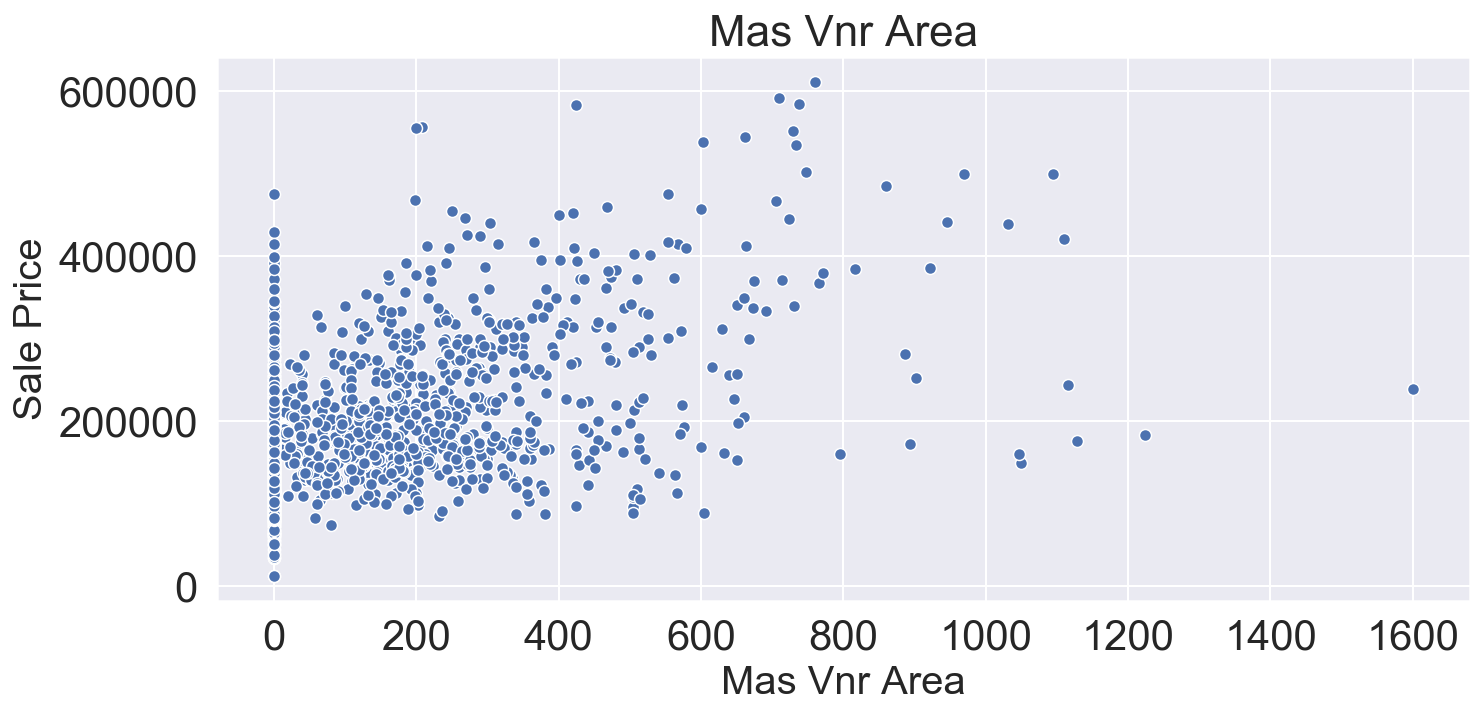

In [400]:
#plotting Sale Price vs year Built
plt.figure(figsize=(10,5))
sns.scatterplot(x= df_train['Mas Vnr Area'], y=df_train['SalePrice'])
plt.title('Mas Vnr Area', size =22)
plt.xlabel('Mas Vnr Area', size =20)
plt.ylabel('Sale Price', size =20);

Mass Vn Area is scattered with salesprice , not strong linear relationship.

## PreProcessing 
we are going to do a train test Split before dropping features

In [401]:
#setting x and y variables

X= df_train
y=df_train['SalePrice']

In [402]:
#running train test split 
X_train , X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [403]:
X_train.shape

(1538, 80)

We are setting dataframe for our X train data set and our validation training set 

In [404]:
df_trainx = X_train

In [405]:
df_valx=X_test

In [406]:
X_test.shape

(513, 80)

In [407]:
y_train.shape

(1538,)

In [408]:
y_test.shape

(513,)

## DATA CLEANING 

### CONVERTING ORDINAL FEATURES TO NUMBERS

In [409]:
# We need to convert the ordinal string data into numbers to feed into our Linear Regression Model
# Data Dictionary Provided in this project reveals the ranking system in English. We have interpreted these to numbers.
rating_dict = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, np.nan : 0, 'NA': 0}
bsmt_expo_dict = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 0, 'NA': 0}
bsmt_fin_dict = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
electrical_dict = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, np.nan: 0, 'NA': 0}
fence_dict = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, np.nan: 0, 'NA': 0}
functional_dict = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal':1, np.nan: 0, 'NA': 0}
garage_finish_dict = {'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
land_slope_dict = {'Gtl': 3, 'Mod': 2, 'Sev': 1, np.nan: 0, 'NA': 0}
lot_shape_dict = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, np.nan: 0, 'NA': 0}
paved_drive_dict = {'Y': 3, 'P': 2, 'N': 1, np.nan: 0, 'NA': 0}
pool_qc_dict = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, np.nan: 0, 'NA': 0}
utilities_dict = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1, np.nan: 0, 'NA': 0}

In [410]:
#converting ordinal features from TRAINING data into numbers
df_trainx['Bsmt Cond'].replace(rating_dict, inplace = True)
df_trainx['Bsmt Qual'].replace(rating_dict, inplace = True)
df_trainx['Exter Cond'].replace(rating_dict, inplace = True)
df_trainx['Exter Qual'].replace(rating_dict, inplace = True)
df_trainx['Fireplace Qu'].replace(rating_dict, inplace = True)
df_trainx['Garage Cond'].replace(rating_dict, inplace = True) 
df_trainx['Garage Qual'].replace(rating_dict, inplace = True)
df_trainx['Heating QC'].replace(rating_dict, inplace = True)
df_trainx['Kitchen Qual'].replace(rating_dict, inplace = True)
df_trainx['BsmtFin Type 1'].replace(bsmt_fin_dict, inplace = True)
df_trainx['BsmtFin Type 2'].replace(bsmt_fin_dict, inplace = True)
df_trainx['Bsmt Exposure'].replace(bsmt_expo_dict, inplace = True)
df_trainx['Electrical'].replace(electrical_dict, inplace = True)
df_trainx['Fence'].replace(fence_dict, inplace = True)
df_trainx['Functional'].replace(functional_dict, inplace = True)
df_trainx['Garage Finish'].replace(garage_finish_dict, inplace = True)
df_trainx['Land Slope'].replace(land_slope_dict, inplace = True)
df_trainx['Lot Shape'].replace(lot_shape_dict, inplace = True)
df_trainx['Paved Drive'].replace(paved_drive_dict, inplace = True)
df_trainx['Pool QC'].replace(pool_qc_dict, inplace = True)
df_trainx['Utilities'].replace(utilities_dict, inplace = True)

# df_trainx['utilities'] = df_trainx['Utilities'].replace(utilities_dict)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [411]:
# Converting ordinal features from Xvalidation TESTING data into numbers
df_valx['Bsmt Cond'].replace(rating_dict, inplace = True)
df_valx['Bsmt Qual'].replace(rating_dict, inplace = True)
df_valx['Exter Cond'].replace(rating_dict, inplace = True)
df_valx['Exter Qual'].replace(rating_dict, inplace = True)
df_valx['Fireplace Qu'].replace(rating_dict, inplace = True)
df_valx['Garage Cond'].replace(rating_dict, inplace = True) 
df_valx['Garage Qual'].replace(rating_dict, inplace = True)
df_valx['Heating QC'].replace(rating_dict, inplace = True)
df_valx['Kitchen Qual'].replace(rating_dict, inplace = True)
df_valx['BsmtFin Type 1'].replace(bsmt_fin_dict, inplace = True)
df_valx['BsmtFin Type 2'].replace(bsmt_fin_dict, inplace = True)
df_valx['Bsmt Exposure'].replace(bsmt_expo_dict, inplace = True)
df_valx['Electrical'].replace(electrical_dict, inplace = True)
df_valx['Fence'].replace(fence_dict, inplace = True)
df_valx['Functional'].replace(functional_dict, inplace = True)
df_valx['Garage Finish'].replace(garage_finish_dict, inplace = True)
df_valx['Land Slope'].replace(land_slope_dict, inplace = True)
df_valx['Lot Shape'].replace(lot_shape_dict, inplace = True)
df_valx['Paved Drive'].replace(paved_drive_dict, inplace = True)
df_valx['Pool QC'].replace(pool_qc_dict, inplace = True)
df_valx['Utilities'].replace(utilities_dict, inplace = True)

### INPUT MISSING VALUES : NOMINAL

In [412]:
# creating dictionary to replace null nominal values
nominal_dict = {np.nan:'None'}

In [413]:
# Replacing nominal null features in Trainsplit data
df_trainx['Garage Type'].replace(nominal_dict, inplace = True)
df_trainx['Mas Vnr Type'].replace(nominal_dict, inplace = True)
df_trainx['Misc Feature'].replace(nominal_dict, inplace = True)
df_trainx['Alley'].replace(nominal_dict, inplace = True)

In [414]:
# X val Test Data
df_valx['Garage Type'].replace(nominal_dict, inplace = True)
df_valx['Mas Vnr Type'].replace(nominal_dict, inplace = True)
df_valx['Misc Feature'].replace(nominal_dict, inplace = True)
df_valx['Alley'].replace(nominal_dict, inplace = True)

INPUTING MISSING VALUES : CONTINUOUS

In [415]:
# Continuous features will be replaced with the mean values of those features.
lot_frontage_dict = {np.nan: df_trainx['Lot Frontage'].mean()}
mas_vnr_area_dict = {np.nan: df_trainx['Mas Vnr Area'].mean()}
bsmtFin_SF_2_dict = {np.nan: df_trainx['BsmtFin SF 2'].mean()}
garage_area_dict = {np.nan: df_trainx['Garage Area'].mean()}
bmst_unf_sf_dict = {np.nan: df_trainx['Bsmt Unf SF'].mean()}
total_bsmt_sf_dict = {np.nan: df_trainx['Total Bsmt SF'].mean()}
bmst_fin_sf_1_dict = {np.nan: df_trainx['BsmtFin SF 1'].mean()}

In [416]:
# Replacing null continuous features train test X
df_trainx['Lot Frontage'].replace(lot_frontage_dict, inplace = True)
df_trainx['Mas Vnr Area'].replace(mas_vnr_area_dict, inplace = True)
df_trainx['BsmtFin SF 2'].replace(bsmtFin_SF_2_dict, inplace = True)
df_trainx['Garage Area'].replace(garage_area_dict, inplace = True)
df_trainx['Bsmt Unf SF'].replace(bmst_unf_sf_dict, inplace = True)
df_trainx['Total Bsmt SF'].replace(total_bsmt_sf_dict, inplace = True)
df_trainx['BsmtFin SF 1'].replace(bmst_fin_sf_1_dict, inplace = True)

In [417]:
# Replacing null continuous features test
df_valx['Lot Frontage'].replace(lot_frontage_dict, inplace = True)
df_valx['Mas Vnr Area'].replace(mas_vnr_area_dict, inplace = True)
df_valx['BsmtFin SF 2'].replace(bsmtFin_SF_2_dict, inplace = True)
df_valx['Garage Area'].replace(garage_area_dict, inplace = True)
df_valx['Bsmt Unf SF'].replace(bmst_unf_sf_dict, inplace = True)
df_valx['Total Bsmt SF'].replace(total_bsmt_sf_dict, inplace = True)
df_valx['BsmtFin SF 1'].replace(bmst_fin_sf_1_dict, inplace = True)

### Inputting Missing Values: Discrete

In [418]:
df_trainx['Bsmt Half Bath'].median()

0.0

In [419]:
df_trainx['Bsmt Full Bath'].median()

0.0

In [420]:
# Discrete features will be replaced with the median values
garage_yr_blt_dict = {np.nan: df_train['Garage Yr Blt'].median()}
bsmt_full_bath_dict = {np.nan: 0.0}
bsmt_half_bath_dict = {np.nan: 0.0}
garage_cars_dict = {np.nan: df_train['Garage Cars'].median()}

In [421]:
# Replacing null values in Train 
df_trainx['Garage Yr Blt'].replace(garage_yr_blt_dict, inplace = True)
df_trainx['Bsmt Full Bath'].replace(bsmt_full_bath_dict, inplace = True)
df_trainx['Bsmt Half Bath'].replace(bsmt_half_bath_dict, inplace = True)
df_trainx['Garage Cars'].replace(garage_cars_dict, inplace = True)

In [422]:
# Replacing null values in Test
df_valx['Garage Yr Blt'].replace(garage_yr_blt_dict, inplace = True)
df_valx['Bsmt Full Bath'].replace(bsmt_full_bath_dict, inplace = True)
df_valx['Bsmt Half Bath'].replace(bsmt_half_bath_dict, inplace = True)
df_valx['Garage Cars'].replace(garage_cars_dict, inplace = True)

In [423]:
# Setting these to float
df_trainx['Bsmt Full Bath'] = df_trainx['Bsmt Full Bath'].astype('float64')
df_trainx['Bsmt Half Bath'] = df_trainx['Bsmt Half Bath'].astype('float64')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [424]:
# checking remaining null values in the TRAINING data
df_trainx.isnull().sum().sort_values(ascending = False).head(2)

SalePrice    0
Sale Type    0
dtype: int64

In [425]:
#checking remaining null values in the TESTING data
df_valx.isnull().sum().sort_values(ascending = False).head(2)

SalePrice    0
Sale Type    0
dtype: int64

## FEATURE ENGINEEERING

In [426]:
# Categorizing the features
nominal_features = ['MS SubClass', 'MS Zoning', 'Street', 'Misc Feature', 'Land Contour', 'Lot Config', 'Neighborhood', 
                    'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
                    'Exterior 2nd', 'Alley', 'Foundation', 'Garage Type', 'Heating', 'Central Air', 'Mas Vnr Type', 
                    'Sale Type']

discrete_features = [ 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 
                     'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars'
                     ]

continuous_features = ['Lot Area', 'Lot Frontage', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 
                       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Wood Deck SF', 'Open Porch SF',
                       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Total Bsmt SF', 'Garage Area', 
                       'Misc Val']

ordinal_features = ['Pool QC', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Fence', 
                    'Exter Qual', 'Exter Cond', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 
                    'Bsmt Exposure', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Bsmt Qual', 'Bsmt Cond', 
                    'Kitchen Qual', 'Functional', 'BsmtFin Type 1', 'Paved Drive']


In [427]:
df_trainx.info

<bound method DataFrame.info of             PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                            
1612  526352080           20        RL      85.00000     10667   Pave  None   
2045  904100100           70        RL     107.00000     12888   Pave  None   
1962  535451110           20        RL      60.00000      7200   Pave  None   
229   905109130           60        RL      80.00000     14000   Pave  None   
1105  528363020           60        RL      69.37821     11929   Pave  None   
...         ...          ...       ...           ...       ...    ...   ...   
1705  528142050           60        RL      82.00000      9709   Pave  None   
1242  535178060           20        RL      72.00000      9000   Pave  None   
2358  527377030           20        RL      78.00000     10140   Pave  None   
1043  527451060          160        RM      21.00000      1869   Pave  None   
2774  907175030     

In [428]:
df_valx.info

<bound method DataFrame.info of             PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                            
2782  907200170           80        RL      55.00000     10780   Pave  None   
2569  535125060           60        RL      88.00000     14200   Pave  None   
1062  528142020           60        RL      74.00000      8899   Pave  None   
287   909100110           70        RL      66.00000      6858   Pave  None   
2809  907410040           60        RL      74.00000      8581   Pave  None   
1013  527214030           20        RL      53.00000     15401   Pave  None   
98    533212020          160        FV      24.00000      2544   Pave  Pave   
1640  527252050          120        RL      61.00000      8035   Pave  None   
389   527375180           20        RL      78.00000     10140   Pave  None   
897   908225370           50        RL      50.00000      8405   Pave  None   
2840  908275290     

Since we have inputed the values for the columns and changed ordinal features , removed null values , replace it with mean 

we will now drop features.


##First we will drop the features that dont have a strong correlation to Sales Price as done in our EDA.


We will drop year sold and month sold as done in our EDA as it does not affect sales price

In [429]:
# Removing PID column, since that is a unique identifier, removing year sold month sold , garage yr built , year built
df_trainx.drop('PID', axis=1, inplace=True)
df_valx.drop('PID', axis=1, inplace=True)

df_trainx.drop('Yr Sold', axis =1,inplace=True)
df_trainx.drop('Mo Sold', axis =1,inplace=True)
df_trainx.drop('Garage Yr Blt',axis=1,inplace=True)
df_trainx.drop('Year Built', axis=1, inplace=True)

df_valx.drop('Yr Sold', axis=1, inplace=True)
df_valx.drop('Mo Sold', axis =1, inplace=True)
df_valx.drop('Garage Yr Blt',axis=1, inplace=True)
df_valx.drop('Year Built', axis=1, inplace=True)




/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [430]:
df_trainx.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
      

In [431]:
df_valx.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
      

In [432]:
df_trainx.shape

(1538, 75)

In [433]:
df_valx.shape

(513, 75)

### DUMMY VARIABLE CREATION

dummy variable creation for both train set and validation training test set

In [434]:
# Getting Dummies for categorizationss
# TRAIN
df_trainx = pd.get_dummies(df_trainx)
df_valx= pd.get_dummies(df_valx)

In [435]:
df_trainx.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities',
       'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Remod/Add',
       'Mas Vnr Area',
       ...
       'Misc Feature_TenC', 'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=212)

In [436]:
df_valx.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities',
       'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Remod/Add',
       'Mas Vnr Area',
       ...
       'Misc Feature_Shed', 'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=193)

In [437]:
df_trainx.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 1612 to 2774
Data columns (total 212 columns):
 #   Column                Dtype  
---  ------                -----  
 0   MS SubClass           int64  
 1   Lot Frontage          float64
 2   Lot Area              int64  
 3   Lot Shape             int64  
 4   Utilities             int64  
 5   Land Slope            int64  
 6   Overall Qual          int64  
 7   Overall Cond          int64  
 8   Year Remod/Add        int64  
 9   Mas Vnr Area          float64
 10  Exter Qual            int64  
 11  Exter Cond            int64  
 12  Bsmt Qual             int64  
 13  Bsmt Cond             int64  
 14  Bsmt Exposure         int64  
 15  BsmtFin Type 1        int64  
 16  BsmtFin SF 1          float64
 17  BsmtFin Type 2        int64  
 18  BsmtFin SF 2          float64
 19  Bsmt Unf SF           float64
 20  Total Bsmt SF         float64
 21  Heating QC            int64  
 22  Electrical            int64  
 23  1st Flr S

### ENSURING CONSISTENT COLUMNS FOR BOTH DATAFRAMES

In [438]:
 #confirming they are the same data types
df_trainx.shape

(1538, 212)

In [439]:
df_valx.shape

(513, 193)

In [440]:

# provides the columns that exist in Train that do NOT exist in Test (and vice versa0)
add_columns_to_train = set(df_test.columns) - set(df_train.columns)
add_columns_to_test = set(df_train.columns) - set(df_test.columns)

# Add columns that were exclusive to test.csv to df_train (and vice versa)
for col in add_columns_to_train:
    df_train[col] = 0
for col in add_columns_to_test:
    df_test[col] = 0

# Reorder df_train to match df_test columns
df_train = df_train[df_test.columns]


In [441]:
# Dropping the 1st column in dummied nominal feature columns
# Train
for col in df_trainx.columns:
    for nom in nominal_features:
        if nom in col:
            df_trainx.drop(columns = col, inplace = True)
# Test    
for col in df_valx.columns:
    for nom in nominal_features:
        if nom in col:
            df_valx.drop(columns = col, inplace = True)

### REVIEWING CORRELATIONS

In [442]:
# finding correlation values
pd.set_option('display.max_rows',785)
df_trainx.corr()[['SalePrice']].sort_values('SalePrice')


SalePrice
Lot Shape        -0.287355
Fence            -0.156758
Enclosed Porch   -0.128597
Kitchen AbvGr    -0.117664
Overall Cond     -0.093388
Land Slope       -0.059323
Bsmt Half Bath   -0.036902
Low Qual Fin SF  -0.035269
Misc Val         -0.007364
Pool QC           0.002856
Pool Area         0.009242
BsmtFin Type 2    0.011882
BsmtFin SF 2      0.025015
Exter Cond        0.039500
3Ssn Porch        0.039846
Functional        0.115782
Bedroom AbvGr     0.137310
Screen Porch      0.148506
Bsmt Unf SF       0.169603
Bsmt Cond         0.218168
Electrical        0.243115
2nd Flr SF        0.258613
Garage Cond       0.263989
Half Bath         0.283577
Paved Drive       0.288109
Garage Qual       0.292020
Bsmt Full Bath    0.296314
Lot Frontage      0.303704
Wood Deck SF      0.315844
Open Porch SF     0.333320
Lot Area          0.339062
BsmtFin Type 1    0.355296
Bsmt Exposure     0.405903
BsmtFin SF 1      0.424717
Fireplaces        0.478415
Mas Vnr Area      0.520718
TotRms AbvGrd     0.523055
Full Bath         0.534629
Fireplace Qu      0.540012
Garage Finish     0.544046
Year Remod/Add    0.546412
Bsmt Qual         0.597249
1st Flr SF        0.600088
Total Bsmt SF     0.613024
Garage Area       0.642596
Garage Cars       0.649464
Kitchen Qual      0.689117
Gr Liv Area       0.691599
Exter Qual        0.713290
Overall Qual      0.795815
SalePrice         1.000000
Utilities              NaN

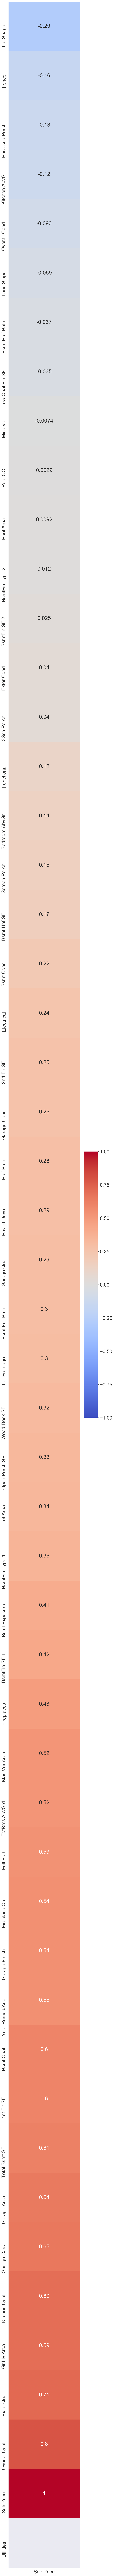

In [443]:
#Heatmaps of updated feature list
plt.figure(figsize = (6, 200)) # this figsizes are in inches wide and tall
# need to specify which column you want to sort by, even though there is only 1 column
sns.heatmap(df_trainx.corr()[['SalePrice']].sort_values('SalePrice'),
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1,
            annot=True);

## PREPROCESSING

We will now convert string to floats for linear regression

In [444]:
df_trainx.dtypes

Lot Frontage       float64
Lot Area             int64
Lot Shape            int64
Utilities            int64
Land Slope           int64
Overall Qual         int64
Overall Cond         int64
Year Remod/Add       int64
Mas Vnr Area       float64
Exter Qual           int64
Exter Cond           int64
Bsmt Qual            int64
Bsmt Cond            int64
Bsmt Exposure        int64
BsmtFin Type 1       int64
BsmtFin SF 1       float64
BsmtFin Type 2       int64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
Electrical           int64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual         int64
TotRms AbvGrd        int64
Functional           int64
Fireplaces           int64
Fireplace Qu         int64
Garage Finish        int64
G

In [445]:
df_valx.dtypes

Lot Frontage       float64
Lot Area             int64
Lot Shape            int64
Utilities            int64
Land Slope           int64
Overall Qual         int64
Overall Cond         int64
Year Remod/Add       int64
Mas Vnr Area       float64
Exter Qual           int64
Exter Cond           int64
Bsmt Qual            int64
Bsmt Cond            int64
Bsmt Exposure        int64
BsmtFin Type 1       int64
BsmtFin SF 1       float64
BsmtFin Type 2       int64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
Electrical           int64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual         int64
TotRms AbvGrd        int64
Functional           int64
Fireplaces           int64
Fireplace Qu         int64
Garage Finish        int64
G

In [446]:
df_trainx.isnull().sum()

Lot Frontage       0
Lot Area           0
Lot Shape          0
Utilities          0
Land Slope         0
Overall Qual       0
Overall Cond       0
Year Remod/Add     0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Garage Finish      0
Garage Cars        0
Garage Area        0
Garage Qual        0
Garage Cond        0
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area    

In [447]:
df_valx.isnull().sum()

Lot Frontage       0
Lot Area           0
Lot Shape          0
Utilities          0
Land Slope         0
Overall Qual       0
Overall Cond       0
Year Remod/Add     0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Garage Finish      0
Garage Cars        0
Garage Area        0
Garage Qual        0
Garage Cond        0
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area    

### Getting rid of Null values before linear regression and lasso , elastic net

In [448]:
df_trainx.shape

(1538, 52)

In [449]:
df_valx.shape

(513, 52)

In [450]:
df_trainx.head(10)

Lot Frontage  Lot Area  Lot Shape  Utilities  Land Slope  Overall Qual  \
Id                                                                             
1612      85.00000     10667          4          4           3             6   
2045     107.00000     12888          4          4           3             7   
1962      60.00000      7200          4          4           3             5   
229       80.00000     14000          4          4           2             7   
1105      69.37821     11929          3          4           3             8   
909       60.00000      9900          4          4           3             6   
2642      58.00000      6451          4          4           3             7   
1462      69.37821     14860          2          4           3             8   
279       65.00000      6305          4          4           3             6   
1173      24.00000      2160          4          4           3             7   

      Overall Cond  Year Remod/Add  Mas Vnr Area  Exter Qual  ...  \
Id                                                            ...   
1612             6            1971         302.0           3  ...   
2045             8            1980           0.0           3  ...   
1962             8            2002           0.0           3  ...   
229              5            1997           0.0           4  ...   
1105             7            1995         466.0           4  ...   
909              7            1950           0.0           3  ...   
2642             7            1970           0.0           3  ...   
1462             5            2003         240.0           4  ...   
279              6            1975           0.0           3  ...   
1173             5            2000         212.0           4  ...   

      Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
Id                                                                            
1612             0             44               0           0             0   
2045           521              0               0           0             0   
1962           194              0               0           0             0   
229            296             44               0           0             0   
1105           192             87               0           0             0   
909            335              0               0           0             0   
2642           264              0              84           0             0   
1462           182             35               0           0             0   
279              0              0               0           0             0   
1173             0             48               0           0             0   

      Pool Area  Pool QC  Fence  Misc Val  SalePrice  
Id                                                    
1612          0        0      0         0     167300  
2045          0        0      0         0     219000  
1962          0        0      0         0     129000  
229           0        0      0         0     328000  
1105          0        0      0         0     290000  
909           0        0      2         0     139500  
2642          0        0      0         0     139900  
1462          0        0      0         0     300000  
279           0        0      0         0     125200  
1173          0        0      0         0     160000  

[10 rows x 52 columns]

In [451]:
df_valx.shape

(513, 52)

In [452]:
df_valx.columns

Index(['Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities', 'Land Slope',
       'Overall Qual', 'Overall Cond', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Val',
       'SalePrice'],
      dtype='object')

### We will now fit train x into validation test data x and test for scores

In [453]:
df_trainy = df_trainx['SalePrice']
df_valy = df_valx['SalePrice']

In [454]:
lr=LinearRegression()

In [455]:
df_trainx.shape

(1538, 52)

In [456]:
df_valx.shape

(513, 52)

### WE WILL NOW DROP SALES PRICE

In [457]:
df_trainx1= df_trainx.drop(['SalePrice'], axis = 1, inplace = True)

In [458]:
df_valx1= df_valx.drop(['SalePrice'], axis = 1, inplace= True)

In [459]:
df_trainx.shape

(1538, 51)

In [460]:
df_valx.shape

(513, 51)

### MODELLING : LINEAR REGRESSION

In [461]:
lr = LinearRegression()
lr.fit(df_trainx,df_trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Instantiate StandardScaler

Model Prep: Scaling Since we're using Lasso and Ridge, we'll want to scale our features. In the cell below, fit a StandardScaler to X_train and use it to transform both X_train and X_test.

In [462]:
ss = StandardScaler()
ss.fit(df_trainx)
X_scaled = ss.transform(df_trainx)
X_scaled[:1, :]

array([[ 0.70956101,  0.13110237,  0.71606454,  0.        ,  0.213597  ,
        -0.07694683,  0.4001637 , -0.62947811,  1.15543384, -0.68763476,
        -0.2234541 , -0.55218871,  0.11513271, -0.57271711,  0.19316349,
         0.84051558, -0.28398501, -0.2832023 ,  0.41306784,  1.16427237,
         0.28652676,  1.05159239, -0.7747143 , -0.10674771,  0.17675569,
        -0.81134796, -0.24281984,  0.77352261, -0.75346791,  0.20194404,
        -0.18993855, -0.77110132,  0.37501397,  0.23050329,  0.66200248,
         1.25951417, -0.80131128,  0.30113496,  0.24025856,  0.27511908,
         0.26661866,  0.31639396, -0.75298501, -0.05272025, -0.36852745,
        -0.10019464, -0.28591248, -0.0659975 , -0.06300464, -0.48905413,
        -0.09365849]])

### Linear Regression Score

In [463]:

ss = StandardScaler()
ss.fit(df_trainx)
X_train_scaled = ss.transform(df_trainx)
X_val_scaled = ss.transform(df_valx)
lr = LinearRegression()
lr.fit(X_train_scaled, df_trainy)
print(lr.score(X_train_scaled, df_trainy))
print(lr.score(X_val_scaled, df_valy))

0.8522873112267859
-2.682559505411521e+21


In [464]:
mean_squared_error(df_valy,lr.predict(X_val_scaled))

1.6470981703757366e+31

In [465]:
np.sqrt(mean_squared_error(df_valy,lr.predict(X_val_scaled)))

4058445725121548.0

our linear regression values suggest we have really high error and its bad at predicting our model. Overfitting.

## LASSO REGRESSION CV


In [466]:

# we will now test lassocv
ss = StandardScaler()
ss.fit(df_trainx)
X_train_scaled = ss.transform(df_trainx)
X_val_scaled = ss.transform(df_valx)

lasso = LassoCV(alphas = np.linspace(0.1,20,1000), max_iter = 10000)
lasso.fit(X_train_scaled, df_trainy)
print(lasso.score(X_train_scaled, df_trainy))
print(lasso.score(X_val_scaled, df_valy))

0.8522855616298894
0.8164612224542177


In [467]:
mean_squared_error(df_valy,lasso.predict(X_val_scaled))

1126932633.1021373

In [468]:
np.sqrt(mean_squared_error(df_valy,lasso.predict(X_val_scaled)))

33569.81729324927

In [469]:
# plot predictions function
def plot_predictions(predictions, regression_type):

    # plotting training data for Y hat vs actual Y
    plt.figure(figsize=(10,5))

    # Generate a scatterplot of carat versus price.
    plt.scatter(predictions,
                y_train,
                alpha = 0.5)

    plt.xlabel('Predicted Sale Price', fontsize = 15)
    plt.ylabel('Actual Sale Price', fontsize = 15)
    plt.title("Predicting Housing Prices with "+regression_type , fontsize = 24)

    # if we want to see each plot value
#     training = 0
#     for i, txt in y_train.iteritems():
#         plt.annotate(i, (predictions[training], y_train[i]))
#         training += 1

    # plot the regression line
    plt.plot(predictions,
             predictions,
             color = 'red');
    return

### RIDGE REGRESSSION

In [470]:
# Set up a list of ridge alphas to check.
# Generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
ridge_alphas = np.linspace(500, 1000, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(
    alphas = ridge_alphas,
    scoring = "r2",
    cv = 5) #How many folds

# Fit model using best ridge alpha!
ridge_cv.fit(X_train_scaled, df_trainy ) # or y_train log

RidgeCV(alphas=array([ 500.        ,  505.05050505,  510.1010101 ,  515.15151515,
        520.2020202 ,  525.25252525,  530.3030303 ,  535.35353535,
        540.4040404 ,  545.45454545,  550.50505051,  555.55555556,
        560.60606061,  565.65656566,  570.70707071,  575.75757576,
        580.80808081,  585.85858586,  590.90909091,  595.95959596,
        601.01010101,  606.06060606,  611.11111111,  616.16161616,
        621.21212121,  626.26262626,  63...
        883.83838384,  888.88888889,  893.93939394,  898.98989899,
        904.04040404,  909.09090909,  914.14141414,  919.19191919,
        924.24242424,  929.29292929,  934.34343434,  939.39393939,
        944.44444444,  949.49494949,  954.54545455,  959.5959596 ,
        964.64646465,  969.6969697 ,  974.74747475,  979.7979798 ,
        984.84848485,  989.8989899 ,  994.94949495, 1000.        ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [471]:
# Optimal Alpha
ridge_cv.alpha_

671.7171717171717

In [472]:
print(ridge_cv.score(X_train_scaled, df_trainy ))
print(ridge_cv.score(X_val_scaled, df_valy))


0.8396531198956151
0.8613159043818883


In [473]:
mean_squared_error(df_valy,ridge_cv.predict(X_val_scaled))

851523776.79601

In [474]:
np.sqrt(mean_squared_error(df_valy,ridge_cv.predict(X_val_scaled)))

29180.880329352814

In [475]:
# Mean Squared Errors for train data
np.sqrt(mean_squared_error(df_trainy,ridge_cv.predict(X_train_scaled)))

31845.205078869156

### ELASTIC NET REGRESSION

In [476]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [477]:
enet_alphas = np.arange(0.5, 1.0, 0.005)
enet_ratio = 0.5
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet_model = enet_model.fit(X_train_scaled, df_trainy)

In [478]:
# Here is the optimal value of alpha
enet_optimal_alpha = enet_model.alpha_
enet_optimal_alpha

0.9950000000000004

In [479]:
mean_squared_error(df_trainy,enet_model.predict(X_train_scaled))

1025509402.2499464

In [480]:
np.sqrt(mean_squared_error(df_trainy,enet_model.predict(X_train_scaled)))

32023.575725548613

In [481]:
np.sqrt(mean_squared_error(df_valy,enet_model.predict(X_val_scaled)))

29223.029279081133

## Choosing the model to test on our testcsv data, after using linear , ridge and lasso  , ridge gives the least mean squared error

### We will now clean the testCV and prepare to test our model on it.

In [482]:
#we read the test CV.
df_test= pd.read_csv('test copy.csv')

In [483]:
df_test.shape

(879, 80)

In [484]:
df_test.info

<bound method DataFrame.info of        Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    2658  902301120          190        RM          69.0      9142   Pave   
1    2718  905108090           90        RL           NaN      9662   Pave   
2    2414  528218130           60        RL          58.0     17104   Pave   
3    1989  902207150           30        RM          60.0      8520   Pave   
4     625  535105100           20        RL           NaN      9500   Pave   
..    ...        ...          ...       ...           ...       ...    ...   
874  1662  527377110           60        RL          80.0      8000   Pave   
875  1234  535126140           60        RL          90.0     14670   Pave   
876  1373  904100040           20        RL          55.0      8250   Pave   
877  1672  527425140           20        RL          60.0      9000   Pave   
878  1939  535327160           20        RL          70.0      8400   Pave   

    Alley Lot Shape Land Contou

In [485]:
df_test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

#### CONVERTING ORDINAL FEATURES TO NUMBERS from test CSV file

In [486]:
df_testy= df_test

In [487]:
# We need to convert the ordinal string data into numbers to feed into our Linear Regression Model
# Data Dictionary Provided in this project reveals the ranking system in English. We have interpreted these to numbers.
rating_dict = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, np.nan : 0, 'NA': 0}
bsmt_expo_dict = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 0, 'NA': 0}
bsmt_fin_dict = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
electrical_dict = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, np.nan: 0, 'NA': 0}
fence_dict = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, np.nan: 0, 'NA': 0}
functional_dict = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal':1, np.nan: 0, 'NA': 0}
garage_finish_dict = {'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
land_slope_dict = {'Gtl': 3, 'Mod': 2, 'Sev': 1, np.nan: 0, 'NA': 0}
lot_shape_dict = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, np.nan: 0, 'NA': 0}
paved_drive_dict = {'Y': 3, 'P': 2, 'N': 1, np.nan: 0, 'NA': 0}
pool_qc_dict = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, np.nan: 0, 'NA': 0}
utilities_dict = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1, np.nan: 0, 'NA': 0}

In [488]:
#converting ordinal features from TRAINING data into numbers
df_testy['Bsmt Cond'].replace(rating_dict, inplace = True)
df_testy['Bsmt Qual'].replace(rating_dict, inplace = True)
df_testy['Exter Cond'].replace(rating_dict, inplace = True)
df_testy['Exter Qual'].replace(rating_dict, inplace = True)
df_testy['Fireplace Qu'].replace(rating_dict, inplace = True)
df_testy['Garage Cond'].replace(rating_dict, inplace = True) 
df_testy['Garage Qual'].replace(rating_dict, inplace = True)
df_testy['Heating QC'].replace(rating_dict, inplace = True)
df_testy['Kitchen Qual'].replace(rating_dict, inplace = True)
df_testy['BsmtFin Type 1'].replace(bsmt_fin_dict, inplace = True)
df_testy['BsmtFin Type 2'].replace(bsmt_fin_dict, inplace = True)
df_testy['Bsmt Exposure'].replace(bsmt_expo_dict, inplace = True)
df_testy['Electrical'].replace(electrical_dict, inplace = True)
df_testy['Fence'].replace(fence_dict, inplace = True)
df_testy['Functional'].replace(functional_dict, inplace = True)
df_testy['Garage Finish'].replace(garage_finish_dict, inplace = True)
df_testy['Land Slope'].replace(land_slope_dict, inplace = True)
df_testy['Lot Shape'].replace(lot_shape_dict, inplace = True)
df_testy['Paved Drive'].replace(paved_drive_dict, inplace = True)
df_testy['Pool QC'].replace(pool_qc_dict, inplace = True)
df_testy['Utilities'].replace(utilities_dict, inplace = True)

#### INPUT MISSING VALUES : NOMINAL for testcsv y dataframe

In [489]:
# creating dictionary to replace null nominal values
nominal_dict = {np.nan:'None'}

In [490]:
# Replacing nominal null features in Testcsv y  data
df_testy['Garage Type'].replace(nominal_dict, inplace = True)
df_testy['Mas Vnr Type'].replace(nominal_dict, inplace = True)
df_testy['Misc Feature'].replace(nominal_dict, inplace = True)
df_testy['Alley'].replace(nominal_dict, inplace = True)

#### INPUTING MISSING VALUES : CONTINUOUS for testcsv y dataframe

In [491]:
# Continuous features will be replaced with the mean values of those features.
lot_frontage_dict = {np.nan: df_testy['Lot Frontage'].mean()}
mas_vnr_area_dict = {np.nan: df_testy['Mas Vnr Area'].mean()}
bsmtFin_SF_2_dict = {np.nan: df_testy['BsmtFin SF 2'].mean()}
garage_area_dict = {np.nan: df_testy['Garage Area'].mean()}
bmst_unf_sf_dict = {np.nan: df_testy['Bsmt Unf SF'].mean()}
total_bsmt_sf_dict = {np.nan: df_testy['Total Bsmt SF'].mean()}
bmst_fin_sf_1_dict = {np.nan: df_testy['BsmtFin SF 1'].mean()}

In [492]:
# Replacing null continuous features train test X
df_testy['Lot Frontage'].replace(lot_frontage_dict, inplace = True)
df_testy['Mas Vnr Area'].replace(mas_vnr_area_dict, inplace = True)
df_testy['BsmtFin SF 2'].replace(bsmtFin_SF_2_dict, inplace = True)
df_testy['Garage Area'].replace(garage_area_dict, inplace = True)
df_testy['Bsmt Unf SF'].replace(bmst_unf_sf_dict, inplace = True)
df_testy['Total Bsmt SF'].replace(total_bsmt_sf_dict, inplace = True)
df_testy['BsmtFin SF 1'].replace(bmst_fin_sf_1_dict, inplace = True)

#### Inputting Missing Values: Discrete

In [493]:
# Discrete features will be replaced with the median values
garage_yr_blt_dict = {np.nan: df_testy['Garage Yr Blt'].median()}
bsmt_full_bath_dict = {np.nan: 0.0}
bsmt_half_bath_dict = {np.nan: 0.0}
garage_cars_dict = {np.nan: df_testy['Garage Cars'].median()}

In [494]:
# Replacing null values in Train 
df_testy['Garage Yr Blt'].replace(garage_yr_blt_dict, inplace = True)
df_testy['Bsmt Full Bath'].replace(bsmt_full_bath_dict, inplace = True)
df_testy['Bsmt Half Bath'].replace(bsmt_half_bath_dict, inplace = True)
df_testy['Garage Cars'].replace(garage_cars_dict, inplace = True)

In [495]:
# Setting these to float
df_testy['Bsmt Full Bath'] = df_testy['Bsmt Full Bath'].astype('float64')
df_testy['Bsmt Half Bath'] = df_testy['Bsmt Half Bath'].astype('float64')

In [496]:
# checking remaining null values in the TRAINING data
df_testy.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

In [497]:
df_testy.shape

(879, 80)

In [498]:
# Removing PID column, since that is a unique identifier, removing year sold month sold , garage yr built , year built
df_testy.drop('PID', axis=1, inplace=True)


df_testy.drop('Yr Sold', axis =1,inplace=True)
df_testy.drop('Mo Sold', axis =1,inplace=True)
df_testy.drop('Garage Yr Blt',axis=1,inplace=True)
df_testy.drop('Year Built', axis=1, inplace=True)

In [499]:
df_testy.shape

(879, 75)

### DUMMY VARIABLE CREATION for test csv data

In [500]:
# Getting Dummies for categorizationss
# TRAIN
df_testy = pd.get_dummies(df_testy)

In [501]:
df_testy.shape

(879, 205)

In [502]:
# Dropping the 1st column in dummied nominal feature columns
# Testy csv
for col in df_testy.columns:
    for nom in nominal_features:
        if nom in col:
            df_testy.drop(columns = col, inplace = True)

In [503]:
df_testy.shape

(879, 52)

In [504]:
df_testy.dtypes

Id                   int64
Lot Frontage       float64
Lot Area             int64
Lot Shape            int64
Utilities            int64
Land Slope           int64
Overall Qual         int64
Overall Cond         int64
Year Remod/Add       int64
Mas Vnr Area       float64
Exter Qual           int64
Exter Cond           int64
Bsmt Qual            int64
Bsmt Cond            int64
Bsmt Exposure        int64
BsmtFin Type 1       int64
BsmtFin SF 1       float64
BsmtFin Type 2       int64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
Electrical           int64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual         int64
TotRms AbvGrd        int64
Functional           int64
Fireplaces           int64
Fireplace Qu         int64
G

In [505]:
df_testy.isnull().sum()

Id                 0
Lot Frontage       0
Lot Area           0
Lot Shape          0
Utilities          0
Land Slope         0
Overall Qual       0
Overall Cond       0
Year Remod/Add     0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Garage Finish      0
Garage Cars        0
Garage Area        0
Garage Qual        0
Garage Cond        0
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch 

In [506]:
df_testy.columns

Index(['Id', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities',
       'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Remod/Add',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence',
       'Misc Val'],
      dtype='object')

the 52 features are

I['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual',
       'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Year Remod/Add', 'Garage Finish', 'Fireplace Qu',
       'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplaces',
       'BsmtFin SF 1', 'Bsmt Exposure', 'BsmtFin Type 1', 'Lot Area',
       'Open Porch SF', 'Wood Deck SF', 'Lot Frontage', 'Bsmt Full Bath',
       'Garage Qual', 'Paved Drive', 'Lot Shape', 'Half Bath', 'Garage Cond',
       '2nd Flr SF'],
     

In [507]:
#we will now test our models on our test data

In [508]:
#check the difference in train data and test csv column

for i in df_testy.columns:
    if i not in df_trainx.columns:
        print(i)

Id


### We will now save the file to submission for Kaggle after predicting using the sales price from training data and the ridge cv model


In [509]:
#Drop the ID column in test CSV file

df_testy.drop(['Id'], axis=1, inplace=True)

In [510]:
#standard scaler the test csv data
ss = StandardScaler()
ss.fit(df_trainx)
X_test_scaled = ss.transform(df_testy)

In [511]:
#use the ridge model trained in train set to test on test csv file
y_hat = ridge_cv.predict(X_test_scaled)

In [512]:
#arrange the sumbimission file for kaggle

submission = pd.DataFrame({'Id':df_test['Id'],'SalePrice':y_hat})

In [513]:
#check the sumbmission file
submission.head()

Id      SalePrice
0  2658  131965.560433
1  2718  178376.768868
2  2414  223860.761124
3  1989  125579.238352
4   625  198321.303452

In [514]:
submission.shape

(879, 2)

In [515]:
#Save the csv file thats submitted to kaggle.

submission.to_csv('submittokaggle.csv', index=False)


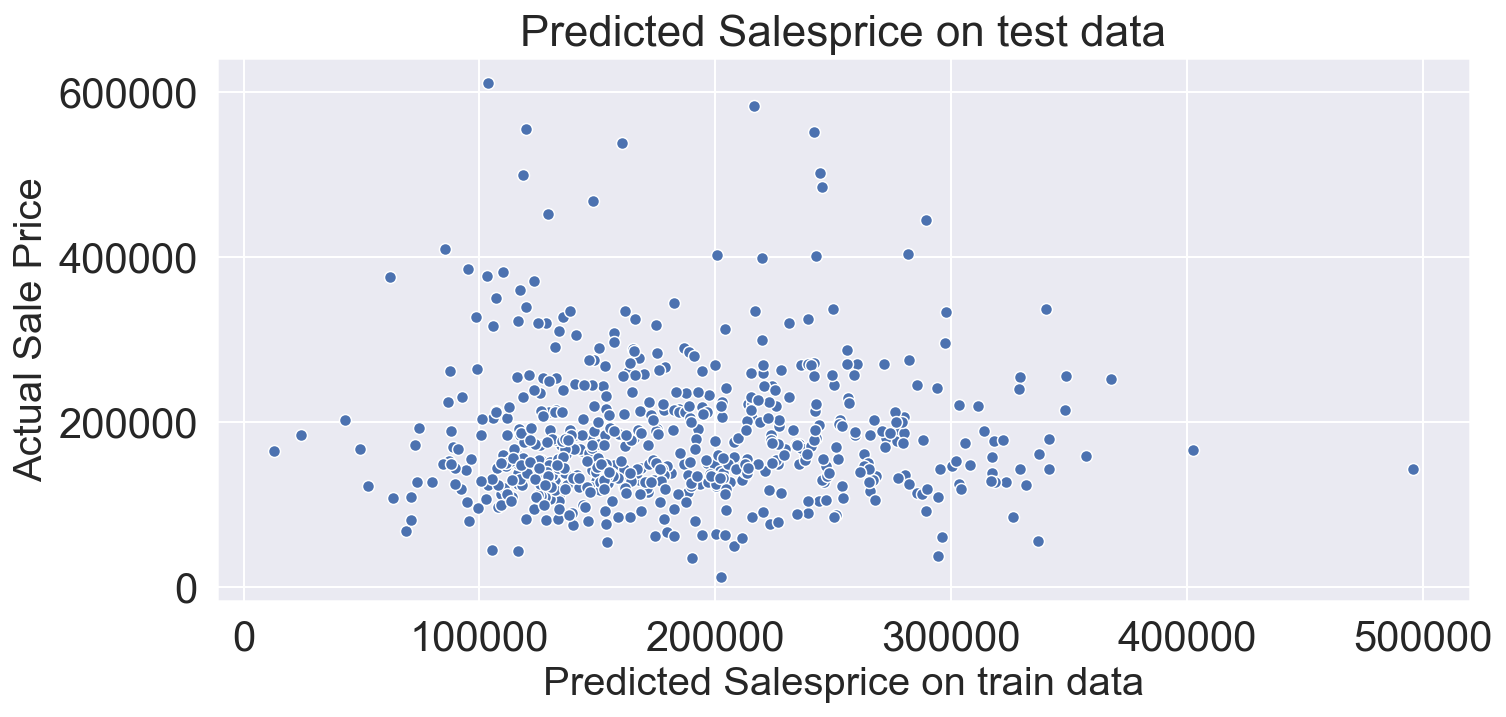

In [516]:
#plotting Sale Price vs Predicted Sales price
plt.figure(figsize=(10,5))
sns.scatterplot(x= submission['SalePrice'], y=df_train['SalePrice'])
plt.title('Predicted Salesprice on test data', size =22)
plt.xlabel('Predicted Salesprice on train data', size =20)
plt.ylabel('Actual Sale Price', size =20);

# We chose 52 features as the final features for the model that was tested on test CSV file.

## Now we are trying to reduce the features to 30

In [517]:
top52col = df_trainx.columns

In [518]:
df_corr = df_trainx

In [519]:
df_corr['SalePrice'] = df_train['SalePrice']

In [520]:
rows_30=list(np.abs(df_corr.corr()['SalePrice']).sort_values(ascending=False).head(31).index)
df_corr=df_corr[rows_30]

In [521]:
df_corr.shape

(1538, 31)

df_corr.shape

In [522]:
df_corr.columns

Index(['SalePrice', 'Overall Qual', 'Exter Qual', 'Gr Liv Area',
       'Kitchen Qual', 'Garage Cars', 'Garage Area', 'Total Bsmt SF',
       '1st Flr SF', 'Bsmt Qual', 'Year Remod/Add', 'Garage Finish',
       'Fireplace Qu', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area',
       'Fireplaces', 'BsmtFin SF 1', 'Bsmt Exposure', 'BsmtFin Type 1',
       'Lot Area', 'Open Porch SF', 'Wood Deck SF', 'Lot Frontage',
       'Bsmt Full Bath', 'Garage Qual', 'Paved Drive', 'Lot Shape',
       'Half Bath', 'Garage Cond', '2nd Flr SF'],
      dtype='object')

## These are the final 30 features including Saleprice

## We will now scale it and run ridge cv on it with 30 features to later test on test cv.

In [523]:
df_corr.columns

Index(['SalePrice', 'Overall Qual', 'Exter Qual', 'Gr Liv Area',
       'Kitchen Qual', 'Garage Cars', 'Garage Area', 'Total Bsmt SF',
       '1st Flr SF', 'Bsmt Qual', 'Year Remod/Add', 'Garage Finish',
       'Fireplace Qu', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area',
       'Fireplaces', 'BsmtFin SF 1', 'Bsmt Exposure', 'BsmtFin Type 1',
       'Lot Area', 'Open Porch SF', 'Wood Deck SF', 'Lot Frontage',
       'Bsmt Full Bath', 'Garage Qual', 'Paved Drive', 'Lot Shape',
       'Half Bath', 'Garage Cond', '2nd Flr SF'],
      dtype='object')

In [524]:
# we will now test ridgecv
df_corrx=df_corr.drop(['SalePrice'], axis = 1)
df_corry=df_corr['SalePrice']

ss = StandardScaler()
ss.fit(df_corrx)
X_corr_scaled = ss.transform(df_corrx)

In [525]:
# Set up a list of ridge alphas to check.
# Generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
ridge_alphas = np.linspace(500, 1000, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(
    alphas = ridge_alphas,
    scoring = "r2",
    cv = 5) #How many folds

# Fit model using best ridge alpha!
ridge_cv.fit(X_corr_scaled, df_corry) # or y_train log

RidgeCV(alphas=array([ 500.        ,  505.05050505,  510.1010101 ,  515.15151515,
        520.2020202 ,  525.25252525,  530.3030303 ,  535.35353535,
        540.4040404 ,  545.45454545,  550.50505051,  555.55555556,
        560.60606061,  565.65656566,  570.70707071,  575.75757576,
        580.80808081,  585.85858586,  590.90909091,  595.95959596,
        601.01010101,  606.06060606,  611.11111111,  616.16161616,
        621.21212121,  626.26262626,  63...
        883.83838384,  888.88888889,  893.93939394,  898.98989899,
        904.04040404,  909.09090909,  914.14141414,  919.19191919,
        924.24242424,  929.29292929,  934.34343434,  939.39393939,
        944.44444444,  949.49494949,  954.54545455,  959.5959596 ,
        964.64646465,  969.6969697 ,  974.74747475,  979.7979798 ,
        984.84848485,  989.8989899 ,  994.94949495, 1000.        ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [526]:
df_testy = pd.DataFrame(df_testy, columns = ['Overall Qual', 'Exter Qual', 'Gr Liv Area',
       'Kitchen Qual', 'Garage Cars', 'Garage Area', 'Total Bsmt SF',
       '1st Flr SF', 'Bsmt Qual', 'Year Remod/Add', 'Garage Finish',
       'Fireplace Qu', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area',
       'Fireplaces', 'BsmtFin SF 1', 'Bsmt Exposure', 'BsmtFin Type 1',
       'Lot Area', 'Open Porch SF', 'Wood Deck SF', 'Lot Frontage',
       'Bsmt Full Bath', 'Garage Qual', 'Paved Drive', 'Lot Shape',
       'Half Bath', 'Garage Cond', '2nd Flr SF']) 

In [527]:
df_testy.shape

(879, 30)

In [528]:
df_corrx.shape

(1538, 30)

In [529]:
df_testy2=df_testy

In [530]:
ss = StandardScaler()
ss.fit(df_corrx)
X_testy_scaled = ss.transform(df_testy2)

In [531]:
y_hat = ridge_cv.predict(X_testy_scaled)


In [532]:
submission2 = pd.DataFrame({'Id':df_test['Id'],'SalePrice':y_hat})

In [533]:
submission2.head()

Id      SalePrice
0  2658  134998.987759
1  2718  183179.379946
2  2414  233980.854027
3  1989  124259.919954
4   625  186796.829447

In [534]:
submission2.to_csv('submittokaggle2.csv', index=False)

### This is the final 30 features we test using ridgecv  with a lower root mean squared error of 35k  based on kaggle second submission score.

In [535]:
df_testy2.columns

Index(['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual',
       'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Year Remod/Add', 'Garage Finish', 'Fireplace Qu',
       'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplaces',
       'BsmtFin SF 1', 'Bsmt Exposure', 'BsmtFin Type 1', 'Lot Area',
       'Open Porch SF', 'Wood Deck SF', 'Lot Frontage', 'Bsmt Full Bath',
       'Garage Qual', 'Paved Drive', 'Lot Shape', 'Half Bath', 'Garage Cond',
       '2nd Flr SF'],
      dtype='object')

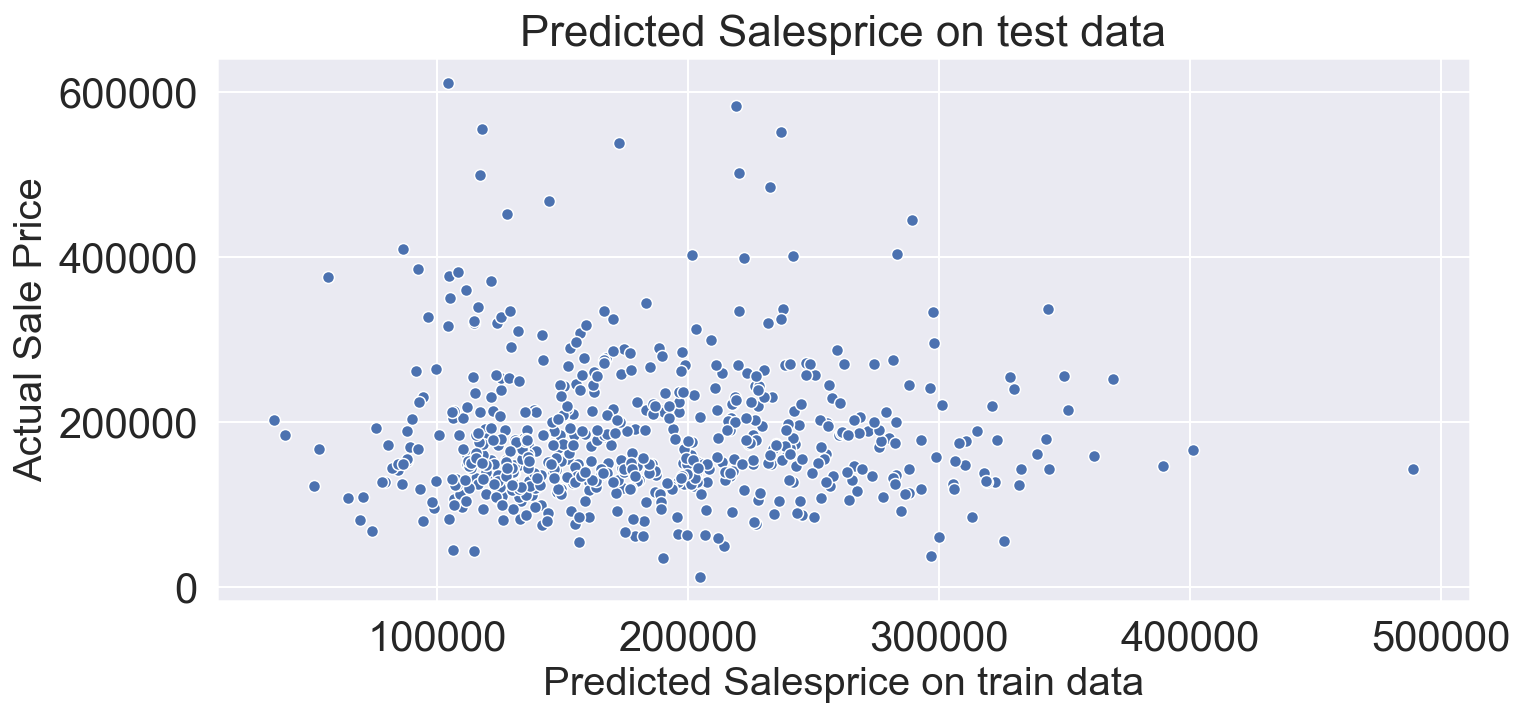

In [536]:
#plotting Sale Price vs Predicted Sales price
plt.figure(figsize=(10,5))
sns.scatterplot(x= submission2['SalePrice'], y=df_train['SalePrice'])
plt.title('Predicted Salesprice on test data', size =22)
plt.xlabel('Predicted Salesprice on train data', size =20)
plt.ylabel('Actual Sale Price', size =20);

## Conclusion

As a business offering predictions  on Sales Price based on the Aimes Iowa housing set , one can narrow down 78 features to 30 features using the ridge regression model and getting a root mean square error of $35000 from sale Price  using just the 30 features to predict salesprice from a test data set.

## The features are

Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual',
       'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Year Remod/Add', 'Garage Finish', 'Fireplace Qu',
       'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplaces',
       'BsmtFin SF 1', 'Bsmt Exposure', 'BsmtFin Type 1', 'Lot Area',
       'Open Porch SF', 'Wood Deck SF', 'Lot Frontage', 'Bsmt Full Bath',
       'Garage Qual', 'Paved Drive', 'Lot Shape', 'Half Bath', 'Garage Cond',
       '2nd Flr SF'],
       


## Business Recommendations
- Which features appear to add the most value to a home?
- Which features hurt the value of a home the most?
The best 30 features are the 30 features mentioned above.
- What are things that homeowners could improve in their homes to increase the value?
They could improve their quality of their garage , lot shape , half bath ,garage condition , garage finish ,
improve their kitchen quality.

They can also install fireaplaces ,improve their conditiions of their houses.

- What neighborhoods seem like they might be a good investment?
THe neighourhoods that seem to be a good investment but does not play a huge factor compaed to the rest of the other features that actually decide and predict sales price.
- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?
It could provide a good indicator to testing the first model , however , we need to determine the other features that  are unique to the other cities and the more features we have the more accurate model we would have.

We would need to check the sales prices , the different features and compare the model and the error in predicitng prices.